In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import nan
import matplotlib.pyplot as plt

In [2]:
input_file = 'most-recent-cohorts-all-data-elements-1.csv'
column_template = 'column_heading_template.csv'
#there were simply too many wierd columns in the original data set of columns.  I went in and deleted several
#in the master excel file and regenerated the column template.
column_template_2 = 'column_heading_template_new.csv'
path = './data/'
path2 = './data_documentation/'

In [3]:
df = pd.read_csv(path+input_file, low_memory=False)

In [4]:
df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0,2.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0,2.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.2836,1.0000,1.0000,440.0,527.0,5.0,4.0,PrivacySuppressed,PrivacySuppressed,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0,2.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.2621,0.7792,0.7539,4732.0,642.0,951.0,2.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6802,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6803,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,National Accrediting Commission of Career Arts...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6804,49005401,4182601,41826,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,Accrediting Commission of Career Schools and C...,www.hci.edu/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.loc[1,'UNITID']

100663

In [6]:
len(df)

6806

In [7]:
df.replace(to_replace = 'PrivacySuppressed', value = nan, inplace = True)

In [8]:
df.loc[df['OPEID6'] == 21997, 'MN_EARN_WNE_P8']

23    NaN
Name: MN_EARN_WNE_P8, dtype: object

In [9]:
column_heading_df = pd.read_csv(path2 + column_template_2)

In [10]:
column_heading_df

,dev-category,NAME OF DATA ELEMENT,developer-friendly name,API data type,VARIABLE NAME,VALUE,LABEL,SOURCE,NOTES
0,academics,Average number of months needed to complete la...,program_reporter.program_1.cip_6_digit.avg_mon...,integer,MTHCMP1,(blank),(blank),IPEDS,(blank)
1,academics,Average number of months needed to complete pr...,program_reporter.program_2.cip_6_digit.avg_mon...,integer,MTHCMP2,(blank),(blank),IPEDS,(blank)
2,academics,Average number of months needed to complete pr...,program_reporter.program_3.cip_6_digit.avg_mon...,integer,MTHCMP3,(blank),(blank),IPEDS,(blank)
3,academics,Average number of months needed to complete pr...,program_reporter.program_4.cip_6_digit.avg_mon...,integer,MTHCMP4,(blank),(blank),IPEDS,(blank)
4,academics,Average number of months needed to complete pr...,program_reporter.program_5.cip_6_digit.avg_mon...,integer,MTHCMP5,(blank),(blank),IPEDS,(blank)
...,...,...,...,...,...,...,...,...,...
462,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.hispanic_2000,float,UG_HISPOLD,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
463,student,Total share of enrollment of undergraduate stu...,demographics.non_resident_aliens_2000,float,UG_NRA,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
464,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.white_2000,float,UG_WHITENH,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
465,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.unknown_2000,float,UG_UNKN,(blank),(blank),IPEDS,Not available in all datafiles due to changing...


In [11]:
complete_variable_name_list = df.columns.to_list()
complete_variable_name_list

['UNITID',
 'OPEID',
 'OPEID6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'ACCREDAGENCY',
 'INSTURL',
 'NPCURL',
 'SCH_DEG',
 'HCM2',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'HIGHDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'HBCU',
 'PBI',
 'ANNHI',
 'TRIBAL',
 'AANAPII',
 'HSI',
 'NANTI',
 'MENONLY',
 'WOMENONLY',
 'RELAFFIL',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',

In [12]:
filtered_variable_name_list = column_heading_df['VARIABLE NAME'].unique().tolist()
filtered_variable_name_list

['MTHCMP1',
 'MTHCMP2',
 'MTHCMP3',
 'MTHCMP4',
 'MTHCMP5',
 'MTHCMP6',
 'CIP01BACHL',
 'CIP04BACHL',
 'CIP05BACHL',
 'CIP26BACHL',
 'CIP52BACHL',
 'CIP09BACHL',
 'CIP10BACHL',
 'CIP11BACHL',
 'CIP46BACHL',
 'CIP13BACHL',
 'CIP15BACHL',
 'CIP14BACHL',
 'CIP23BACHL',
 'CIP19BACHL',
 'CIP16BACHL',
 'CIP51BACHL',
 'CIP54BACHL',
 'CIP43BACHL',
 'CIP22BACHL',
 'CIP24BACHL',
 'CIP25BACHL',
 'CIP27BACHL',
 'CIP47BACHL',
 'CIP29BACHL',
 'CIP30BACHL',
 'CIP03BACHL',
 'CIP31BACHL',
 'CIP12BACHL',
 'CIP38BACHL',
 'CIP40BACHL',
 'CIP48BACHL',
 'CIP42BACHL',
 'CIP44BACHL',
 'CIP41BACHL',
 'CIP45BACHL',
 'CIP39BACHL',
 'CIP49BACHL',
 'CIP50BACHL',
 'CIPCODE1',
 'CIPCODE2',
 'CIPCODE3',
 'CIPCODE4',
 'CIPCODE5',
 'CIPCODE6',
 'CIPTITLE1',
 'CIPTITLE2',
 'CIPTITLE3',
 'CIPTITLE4',
 'CIPTITLE5',
 'CIPTITLE6',
 'PRGMOFR',
 'PCIP01',
 'PCIP04',
 'PCIP05',
 'PCIP26',
 'PCIP52',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP46',
 'PCIP13',
 'PCIP15',
 'PCIP14',
 'PCIP23',
 'PCIP19',
 'PCIP16',
 'PCIP51',
 'PCIP54

In [13]:
df['PCT90_EARN_WNE_P10']

0       70000
1       84000
2       79500
3       93300
4       55400
        ...  
6801      NaN
6802      NaN
6803      NaN
6804      NaN
6805      NaN
Name: PCT90_EARN_WNE_P10, Length: 6806, dtype: object

In [14]:
filtered_df = df.copy()


In [15]:
for variable in complete_variable_name_list:
    if variable not in filtered_variable_name_list:
        filtered_df.drop(columns = variable, inplace = True)

In [16]:
filtered_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,https://www.gmc.edu/index.cms,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6802,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,https://www.gmc.edu/index.cms,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6803,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,NaN,NaN,0,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6804,49005401,4182601,41826,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,www.hci.edu/,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
filtered_df.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'INSTURL', 'SCH_DEG', 'MAIN',
       ...
       'CIPTFBSANNUAL6', 'MTHCMP1', 'MTHCMP2', 'MTHCMP3', 'MTHCMP4', 'MTHCMP5',
       'MTHCMP6', 'FTFTPCTPELL_POOLED_SUPP', 'FTFTPCTFLOAN_POOLED_SUPP',
       'SCUGFFN_POOLED'],
      dtype='object', length=467)

In [18]:
column_heading_df['dev-category'].unique()

array(['academics', 'admissions', 'aid', 'completion', 'cost', 'earnings',
       'repayment', 'root', 'school', 'student'], dtype=object)

In [19]:
df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0,2.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0,2.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.2836,1.0000,1.0000,440.0,527.0,5.0,4.0,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0,2.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.2621,0.7792,0.7539,4732.0,642.0,951.0,2.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6802,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6803,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,National Accrediting Commission of Career Arts...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6804,49005401,4182601,41826,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,Accrediting Commission of Career Schools and C...,www.hci.edu/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.loc[df['INSTNM'] == 'Harvard University', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
1492,3,15561.0,50420.0


In [21]:
df.loc[df['INSTNM'] == 'Ohio State University-Main Campus', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
2666,3,NaN,10726.0


In [22]:
df.loc[df['INSTNM'] == 'Dartmouth College', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
1959,3,31449.0,55453.0


In [23]:
df.loc[df['INSTNM'] == 'Harvey Mudd College', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
315,3,32739.0,56620.0


In [24]:
df.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'OMENRUP_PARTTIME_POOLED_SUPP', 'FTFTPCTPELL', 'FTFTPCTFLOAN', 'UG12MN',
       'G12MN', 'SCUGFFN', 'POOLYRS_FTFTAIDPCT', 'FTFTPCTPELL_POOLED_SUPP',
       'FTFTPCTFLOAN_POOLED_SUPP', 'SCUGFFN_POOLED'],
      dtype='object', length=1986)

In [25]:
df['PREDDEG']

0       3
1       3
2       3
3       3
4       3
       ..
6801    0
6802    0
6803    0
6804    0
6805    0
Name: PREDDEG, Length: 6806, dtype: int64

In [26]:
df.loc[df['PREDDEG'] == 3, :]

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0,2.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0,2.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.2836,1.0000,1.0000,440.0,527.0,5.0,4.0,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0,2.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.2621,0.7792,0.7539,4732.0,642.0,951.0,2.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,492069,4276100,42761,Champion Christian College,Hot Springs,AR,71913,Transnational Association of Christian College...,championchristiancollege.com,championchristiancollege.com/NetPriceCalculato...,...,NaN,0.0000,0.0000,57.0,NaN,20.0,4.0,NaN,NaN,20.0
6314,492689,1067401,10674,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,Southern Association of Colleges and Schools C...,elpaso.ttuhsc.edu/,www.depts.ttu.edu/financialaid/netCostCalcHome...,...,NaN,NaN,NaN,370.0,471.0,0.0,4.0,NaN,NaN,0.0
6318,492759,638521,6385,Chamberlain University-Louisiana,Jefferson,LA,70121,Higher Learning Commission,https://www.chamberlain.edu/,https://www.chamberlain.edu/admissions/financi...,...,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN
6319,492801,246100,2461,Drury University-College of Continuing Profess...,Springfield,MO,65802,Higher Learning Commission,www.drury.edu/ccps/,tcc.ruffalonl.com/Drury%20University/Freshman-...,...,0.3681,0.7619,0.4048,2857.0,NaN,42.0,2.0,0.7619,0.4048,42.0


In [27]:
cost_df = filtered_df.loc[df['PREDDEG'] == 3, ['INSTNM', 'STABBR','TUITIONFEE_IN', 'TUITIONFEE_OUT', 'PCT10_EARN_WNE_P6', 'PCT25_EARN_WNE_P6', 'PCT75_EARN_WNE_P6', 'PCT90_EARN_WNE_P6', 'MN_EARN_WNE_P6']]

In [28]:
cost_df

,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
0,Alabama A & M University,AL,9744.0,18354.0,4500,15000,36800,51400,28400
1,University of Alabama at Birmingham,AL,8568.0,19704.0,9700,21000,50800,66200,39400
2,Amridge University,AL,6900.0,6900.0,7300,15200,47200,75400,35400
3,University of Alabama in Huntsville,AL,10714.0,22362.0,9100,22700,56900,70300,40300
4,Alabama State University,AL,11068.0,19396.0,4300,13700,32100,39800,24400
...,...,...,...,...,...,...,...,...,...
6299,Champion Christian College,AR,5240.0,5240.0,NaN,NaN,NaN,NaN,NaN
6314,Texas Tech University Health Sciences Center-E...,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6318,Chamberlain University-Louisiana,LA,19375.0,19375.0,NaN,NaN,NaN,NaN,NaN
6319,Drury University-College of Continuing Profess...,MO,6247.0,6247.0,NaN,NaN,NaN,NaN,NaN


In [29]:
cost_df = cost_df.fillna(0)

In [30]:
cost_df=cost_df.sort_values(by = 'TUITIONFEE_IN', ascending = False).reset_index()

In [31]:
cost_df

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
0,2153,Columbia University in the City of New York,NY,59430.0,59430.0,13200,40500,97900,165900,77900
1,890,University of Chicago,IL,58230.0,58230.0,11900,33200,85200,160400,72100
2,2368,Vassar College,NY,56960.0,56960.0,9000,22700,49900,61200,39400
3,600,Trinity College,CT,56910.0,56910.0,13500,30600,66800,87100,52000
4,2219,Jewish Theological Seminary of America,NY,56778.0,56778.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2053,229,Sofia University,CA,0.0,0.0,0,0,0,0,0
2054,2347,SUNY Downstate Health Sciences University,NY,0.0,0.0,34900,55100,98700,127700,80400
2055,3560,Bon Secours Memorial College of Nursing,VA,0.0,0.0,26300,36200,63900,71800,50600
2056,309,Golden Gate University-San Francisco,CA,0.0,0.0,14100,43000,94000,127100,72900


In [32]:
cost_df.loc[cost_df['INSTNM'] == 'Ohio State University-Main Campus', :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
1382,2666,Ohio State University-Main Campus,OH,10726.0,30742.0,10700,24400,54000,65700,41500


In [33]:
cost_df.loc[cost_df['index'] == 2666, :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
1382,2666,Ohio State University-Main Campus,OH,10726.0,30742.0,10700,24400,54000,65700,41500


In [34]:
cost_df.loc[cost_df['INSTNM'] == 'Smith College', :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
81,1544,Smith College,MA,52404.0,52404.0,8900,18900,48700,63300,37400


In [35]:
cost_clean_df = cost_df.copy()

In [36]:
x = cost_clean_df['TUITIONFEE_IN'].to_list()
y1 = cost_clean_df['PCT10_EARN_WNE_P6'].astype(int).to_list()
y2 = cost_clean_df['PCT25_EARN_WNE_P6'].astype(int).to_list()
y3 = cost_clean_df['PCT75_EARN_WNE_P6'].astype(int).to_list()
y4 = cost_clean_df['PCT90_EARN_WNE_P6'].astype(int).to_list()
y5 = cost_clean_df['MN_EARN_WNE_P6'].astype(int).to_list()

In [37]:
x


[59430.0,
 58230.0,
 56960.0,
 56910.0,
 56778.0,
 56620.0,
 56550.0,
 56426.0,
 56382.0,
 56340.0,
 56225.0,
 56092.0,
 55930.0,
 55900.0,
 55870.0,
 55695.0,
 55584.0,
 55470.0,
 55466.0,
 55465.0,
 55464.0,
 55453.0,
 55450.0,
 55395.0,
 55290.0,
 55255.0,
 55230.0,
 55210.0,
 55188.0,
 55052.0,
 55032.0,
 55024.0,
 54944.0,
 54846.0,
 54838.0,
 54820.0,
 54820.0,
 54759.0,
 54686.0,
 54680.0,
 54661.0,
 54620.0,
 54568.0,
 54492.0,
 54480.0,
 54450.0,
 54420.0,
 54405.0,
 54344.0,
 54118.0,
 54104.0,
 54056.0,
 53948.0,
 53932.0,
 53922.0,
 53909.0,
 53880.0,
 53860.0,
 53794.0,
 53740.0,
 53736.0,
 53732.0,
 53630.0,
 53430.0,
 53399.0,
 53391.0,
 53343.0,
 53322.0,
 53308.0,
 53244.0,
 52930.0,
 52780.0,
 52770.0,
 52764.0,
 52724.0,
 52687.0,
 52626.0,
 52610.0,
 52595.0,
 52588.0,
 52455.0,
 52404.0,
 52392.0,
 52362.0,
 52360.0,
 52202.0,
 52050.0,
 51960.0,
 51870.0,
 51853.0,
 51832.0,
 51828.0,
 51711.0,
 51668.0,
 51522.0,
 51447.0,
 51354.0,
 51306.0,
 51104.0,
 50960.0,


In [38]:
y1

[13200,
 11900,
 9000,
 13500,
 0,
 14900,
 10600,
 9200,
 18500,
 4600,
 13500,
 18400,
 10000,
 4800,
 13100,
 19700,
 23500,
 7600,
 10500,
 14600,
 21300,
 15600,
 7100,
 7000,
 10300,
 8000,
 15500,
 10600,
 14900,
 6300,
 8100,
 6400,
 8500,
 10000,
 8400,
 10300,
 10100,
 9100,
 7900,
 4400,
 9800,
 11000,
 15200,
 12100,
 12200,
 14000,
 6700,
 14600,
 8500,
 4600,
 23300,
 5900,
 14200,
 13400,
 11600,
 11400,
 23600,
 5000,
 13100,
 16900,
 0,
 12600,
 16400,
 14000,
 12600,
 21400,
 6700,
 13000,
 20300,
 15300,
 20100,
 5200,
 18800,
 4600,
 9700,
 9500,
 11100,
 14800,
 11400,
 5100,
 17300,
 8900,
 6100,
 0,
 10300,
 19000,
 9700,
 6500,
 6700,
 13000,
 19400,
 8300,
 12700,
 3700,
 15700,
 14400,
 18700,
 12900,
 24300,
 5200,
 5200,
 11700,
 20800,
 16500,
 18800,
 6800,
 9900,
 6900,
 10100,
 0,
 4500,
 9600,
 26200,
 22700,
 12700,
 10500,
 7200,
 11300,
 10200,
 11000,
 19500,
 10200,
 5600,
 4300,
 6300,
 6300,
 19100,
 17200,
 5700,
 6800,
 6700,
 10200,
 11600,
 2

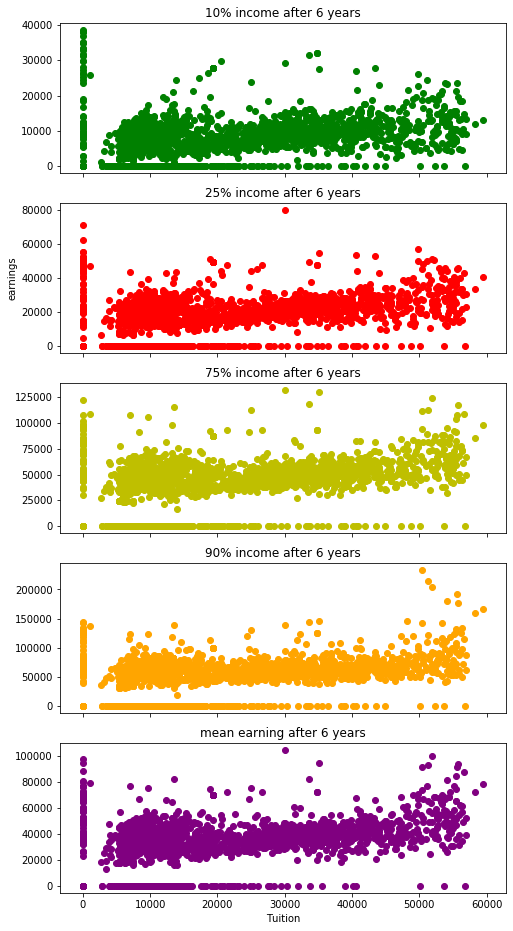

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, sharex = True, figsize=(8,16))
ax1.set_title("10% income after 6 years")
ax2.set_title("25% income after 6 years")
ax3.set_title("75% income after 6 years")
ax4.set_title("90% income after 6 years")
ax5.set_title("mean earning after 6 years")
ax5.set_xlabel("Tuition")
ax2.set_ylabel("earnings")
ax1.scatter(x,y1, color = 'g')

ax2.scatter(x,y2, color = 'r')

ax3.scatter(x,y3, color = 'y')

ax4.scatter(x,y4, color = 'orange')
ax5.scatter(x,y5, color = 'purple')

plt.show()

In [40]:
cost_clean_df.loc[cost_clean_df['PCT90_EARN_WNE_P6'].astype(int) > 150000, :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
0,2153,Columbia University in the City of New York,NY,59430.0,59430.0,13200,40500,97900,165900,77900
1,890,University of Chicago,IL,58230.0,58230.0,11900,33200,85200,160400,72100
15,2413,Duke University,NC,55695.0,55695.0,19700,46000,117100,176900,93200
16,2992,University of Pennsylvania,PA,55584.0,55584.0,23500,45400,108000,191500,91200
50,621,Georgetown University,DC,54104.0,54104.0,23300,44200,95500,179900,81100
90,1508,Massachusetts Institute of Technology,MA,51832.0,51832.0,19400,50800,124100,203700,99600
96,3841,Stanford University,CA,51354.0,51354.0,18700,41600,112800,214600,92800
104,1492,Harvard University,MA,50420.0,50420.0,18800,45100,111300,233800,91300


In [41]:
cost_clean_df.loc[cost_clean_df['INSTNM'] == 'Smith College', :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
81,1544,Smith College,MA,52404.0,52404.0,8900,18900,48700,63300,37400


In [42]:
cost_clean_df.describe()

,index,TUITIONFEE_IN,TUITIONFEE_OUT
count,2058.000000,2058.000000,2058.000000
mean,2507.677357,21140.330904,24318.506317
std,1567.057753,14867.713737,13712.741397
min,0.000000,0.000000,0.000000
25%,1267.250000,8979.500000,14604.500000
50%,2345.500000,16540.500000,22425.000000
75%,3467.750000,32007.500000,33283.500000
max,6322.000000,59430.000000,59430.000000


In [43]:
#PREDEG == 3 is the university is predominately a 4 year school.
filtered_4_year_df = filtered_df.loc[df['PREDDEG'] == 3, :]
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,492069,4276100,42761,Champion Christian College,Hot Springs,AR,71913,championchristiancollege.com,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
6314,492689,1067401,10674,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,elpaso.ttuhsc.edu/,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6318,492759,638521,6385,Chamberlain University-Louisiana,Jefferson,LA,70121,https://www.chamberlain.edu/,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6319,492801,246100,2461,Drury University-College of Continuing Profess...,Springfield,MO,65802,www.drury.edu/ccps/,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7619,0.4048,42.0


In [44]:
filtered_4_year_df = filtered_4_year_df.fillna(0)
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,492069,4276100,42761,Champion Christian College,Hot Springs,AR,71913,championchristiancollege.com,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,20.0
6314,492689,1067401,10674,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,elpaso.ttuhsc.edu/,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
6318,492759,638521,6385,Chamberlain University-Louisiana,Jefferson,LA,70121,https://www.chamberlain.edu/,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
6319,492801,246100,2461,Drury University-College of Continuing Profess...,Springfield,MO,65802,www.drury.edu/ccps/,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7619,0.4048,42.0


Begin random forest regession.

In [45]:
#try to predict median income.  Must drop all columns relating to income from data set.
#determine all column headings with earnings as the dev-category
column_heading_df.loc[column_heading_df['dev-category'] == 'earnings', :]

,dev-category,NAME OF DATA ELEMENT,developer-friendly name,API data type,VARIABLE NAME,VALUE,LABEL,SOURCE,NOTES
242,earnings,10th percentile of earnings of students workin...,10_yrs_after_entry.working_not_enrolled.earnin...,integer,PCT10_EARN_WNE_P10,(blank),(blank),Treasury,(blank)
243,earnings,10th percentile of earnings of students workin...,6_yrs_after_entry.working_not_enrolled.earning...,integer,PCT10_EARN_WNE_P6,(blank),(blank),Treasury,(blank)
244,earnings,10th percentile of earnings of students workin...,8_yrs_after_entry.10th_percentile_earnings,integer,PCT10_EARN_WNE_P8,(blank),(blank),Treasury,(blank)
245,earnings,25th percentile of earnings of students workin...,10_yrs_after_entry.working_not_enrolled.earnin...,integer,PCT25_EARN_WNE_P10,(blank),(blank),Treasury,(blank)
246,earnings,25th percentile of earnings of students workin...,6_yrs_after_entry.working_not_enrolled.earning...,integer,PCT25_EARN_WNE_P6,(blank),(blank),Treasury,(blank)
...,...,...,...,...,...,...,...,...,...
312,earnings,Standard deviation of earnings of students wor...,10_yrs_after_entry.working_not_enrolled.std_dev,integer,SD_EARN_WNE_P10,(blank),(blank),Treasury,(blank)
313,earnings,Standard deviation of earnings of students wor...,6_yrs_after_entry.working_not_enrolled.std_dev,integer,SD_EARN_WNE_P6,(blank),(blank),Treasury,(blank)
314,earnings,Standard deviation of earnings of students wor...,7_yrs_after_entry.std_dev,float,SD_EARN_WNE_P7,(blank),(blank),Treasury,(blank)
315,earnings,Standard deviation of earnings of students wor...,8_yrs_after_entry.std_deviation,float,SD_EARN_WNE_P8,(blank),(blank),Treasury,(blank)


In [46]:
#make a list of these variable names
earning_variable_name = column_heading_df.loc[column_heading_df['dev-category'] == 'earnings', 'VARIABLE NAME'].to_list()
earning_variable_name

['PCT10_EARN_WNE_P10',
 'PCT10_EARN_WNE_P6',
 'PCT10_EARN_WNE_P8',
 'PCT25_EARN_WNE_P10',
 'PCT25_EARN_WNE_P6',
 'PCT25_EARN_WNE_P8',
 'PCT75_EARN_WNE_P10',
 'PCT75_EARN_WNE_P6',
 'PCT75_EARN_WNE_P8',
 'PCT90_EARN_WNE_P10',
 'PCT90_EARN_WNE_P6',
 'PCT90_EARN_WNE_P8',
 'MN_EARN_WNE_INDEP0_P10',
 'MN_EARN_WNE_INDEP0_INC1_P10',
 'MN_EARN_WNE_INDEP0_P6',
 'MN_EARN_WNE_INDEP0_INC1_P6',
 'MN_EARN_WNE_MALE0_P10',
 'MN_EARN_WNE_MALE0_P6',
 'MN_EARN_WNE_INDEP1_P10',
 'MN_EARN_WNE_INDEP1_P6',
 'MN_EARN_WNE_MALE1_P10',
 'MN_EARN_WNE_MALE1_P6',
 'MN_EARN_WNE_P10',
 'MN_EARN_WNE_INC3_P10',
 'MN_EARN_WNE_INC1_P10',
 'MN_EARN_WNE_INC2_P10',
 'MN_EARN_WNE_P6',
 'MN_EARN_WNE_INC3_P6',
 'MN_EARN_WNE_INC1_P6',
 'MN_EARN_WNE_INC2_P6',
 'MN_EARN_WNE_P7',
 'MN_EARN_WNE_P8',
 'MN_EARN_WNE_P9',
 'MD_EARN_WNE_P10',
 'MD_EARN_WNE_P6',
 'MD_EARN_WNE_P8',
 'COUNT_WNE_INDEP0_P10',
 'COUNT_WNE_INDEP0_INC1_P10',
 'COUNT_WNE_INDEP0_P6',
 'COUNT_WNE_INDEP0_INC1_P6',
 'COUNT_WNE_MALE0_P10',
 'COUNT_WNE_MALE0_P6',
 'COU

In [47]:
#need to drop all rows that have a 0
row_mean_0 = filtered_4_year_df.loc[filtered_4_year_df['MN_EARN_WNE_P6'] == 0, :].index
row_mean_0

Int64Index([  23,   44,   57,  193,  229,  231,  328,  338,  339,  398,
            ...
            6252, 6254, 6261, 6263, 6271, 6299, 6314, 6318, 6319, 6322],
           dtype='int64', length=232)

In [48]:
filtered_4_year_df = filtered_4_year_df.drop(index = row_mean_0)


In [49]:
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,484765,42098889,20988,University of Phoenix-Virginia,Virginia Beach,VA,23462,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.0
5912,484783,42098854,20988,University of Phoenix-Pennsylvania,Philadelphia,PA,19103,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8824,0.9412,34.0
5914,484835,2189106,21891,CEM College-Mayaguez,Mayaguez,PR,00680-0000,www.cemcollege.edu/cem/,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9746,0.4915,118.0
5918,484905,4242100,42421,University of North Texas at Dallas,Dallas,TX,75241,untdallas.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6975,0.1793,552.0


In [50]:
filtered_4_year_df.to_csv(path2+'filter_4_year_df.csv')

In [51]:
#filter 4 year file based on only main campus
filtered_4_year_main_df = filtered_4_year_df.loc[filtered_4_year_df['MAIN'] == 1, :]

In [52]:
filtered_4_year_main_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,482158,158100,1581,Middle Georgia State University,Macon,GA,31206,https://www.mga.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5732,0.5295,2317.0
5798,482477,1072700,10727,DeVry University-Illinois,Chicago,IL,60618,https://www.devry.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8607,0.913,517.0
5809,482680,158500,1585,University of North Georgia,Dahlonega,GA,30597,www.ung.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3319,0.3079,7300.0
5900,484613,2098800,20988,University of Phoenix-Arizona,Phoenix,AZ,85040,https://www.phoenix.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6981,0.7745,9022.0


In [53]:
filtered_4_year_main_df.to_csv(path2+'filter_4_year_main_df.csv')

In [54]:
filtered_4_year_column_list = filtered_4_year_df.columns.tolist()
filtered_4_year_column_list

['UNITID',
 'OPEID',
 'OPEID6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'INSTURL',
 'SCH_DEG',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'MENONLY',
 'WOMENONLY',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',
 'PCIP41',
 'PCIP42',
 'PCIP43',
 'PCIP44',
 'PCIP45',
 'PCIP46',
 'PCIP47',
 'PCIP48',
 'PCIP49',
 'PCIP50',
 'PCIP51',
 'PCIP52

In [55]:
#value for y is mean earning 6 years from enrollment
y = filtered_4_year_df['MN_EARN_WNE_P6']
y_baseline = y

In [56]:
from pandas.api.types import is_numeric_dtype

In [57]:
#for X we need to drop all columns that are earnings.  We have kept the one we care about as y.
for variable in earning_variable_name:
    if variable in filtered_4_year_column_list :
        filtered_4_year_df.drop(columns = variable, inplace = True)

In [58]:
y

0       28400
1       39400
2       35400
3       40300
4       24400
        ...  
5911    34200
5912    34200
5914    18500
5918    39300
5931    71900
Name: MN_EARN_WNE_P6, Length: 1826, dtype: object

In [59]:
#note the fewer columns.  All earnings categories were deleted.
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,484765,42098889,20988,University of Phoenix-Virginia,Virginia Beach,VA,23462,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.0
5912,484783,42098854,20988,University of Phoenix-Pennsylvania,Philadelphia,PA,19103,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8824,0.9412,34.0
5914,484835,2189106,21891,CEM College-Mayaguez,Mayaguez,PR,00680-0000,www.cemcollege.edu/cem/,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9746,0.4915,118.0
5918,484905,4242100,42421,University of North Texas at Dallas,Dallas,TX,75241,untdallas.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6975,0.1793,552.0


In [60]:
#need to drop all text based columns
filtered_4_year_df = filtered_4_year_df.drop(columns = ['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'INSTURL'])

In [61]:
#get list of remaining columns to determine which ones still contain some text
column_list = filtered_4_year_df.columns.to_list()

In [62]:
column_list

['SCH_DEG',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'MENONLY',
 'WOMENONLY',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',
 'PCIP41',
 'PCIP42',
 'PCIP43',
 'PCIP44',
 'PCIP45',
 'PCIP46',
 'PCIP47',
 'PCIP48',
 'PCIP49',
 'PCIP50',
 'PCIP51',
 'PCIP52',
 'PCIP54',
 'CIP01BACHL',
 'CIP03BACHL',
 'CIP04BACHL',
 'CIP05BACHL',
 'CIP09BA

In [63]:
len(column_list)

384

In [64]:
filtered_4_year_df['VETERAN'].dtypes

dtype('O')

In [65]:
is_numeric_dtype(filtered_4_year_df['VETERAN'])

False

In [66]:
filtered_4_year_df['FEMALE'].dtypes

dtype('O')

In [67]:
for value in filtered_4_year_df['FEMALE']:
    print(value)

0.5640301318
0.6390907397
0.6486486486
0.4763499372
0.6134185304
0.6152524168
0.705078125
0.6929480901
0.531504671
0.520361991
0.7628668652
0.6387315968
0.4704142012
0.5886792453
0
0.5577586207
0.4668079096
0.6732804233
0.6827586207
0.6013931889
0.5860805861
0.6588785047
0.6229367631
0.6452599388
0.4610051993
0.4897540984
0.6510154346
0.6509505703
0.2394366197
0.5987699877
0.5940482875
0.6301369863
0.5568306611
0.5628539071
0.5445544554
0.1816434407
0.743284234
0.6385814497
0.6274509804
0.6956521739
0.2894736842
0.6464909992
0.8375
0.4325068871
0.5588193956
0.5960854093
0.6108749161
0.5661364132
0.6165561287
0.4609929078
0.3921568627
0.5682910089
0.5543415756
0.505952381
0.6155844156
0.4945054945
0.4859550562
0.6232439336
0.4346153846
0.5619419643
0.5636766334
0.5731981982
0.5523465704
0.7258883249
0.6677920324
0.7764705882
0.6606170599
0.6189189189
0.4565217391
0.6172284644
0.5029626253
0.6426605505
0.6771726535
0.6247122956
0.4947096457
0.5745917085
0.6572807723
0.6211972522
0.598007

0.7326203209
0.6058763931
0.5823633157
0.6276041667
0.5760869565
0.6193480547
0.6840336134
0.624535316
0.5696784074
0.6297624384
0.6258879242
0.5290482077
0.6571428571
0.7112387203
0.4731861199
0.6840417001
0.5715309291
0.9488372093
0.5183016105
0.6278280543
0.566749844
0.8467391304
0.4725363489
0.955026455
0.6342592593
0.7508833922
0.6711111111
0.4569892473
0.6494891159
0.5355535554
0.5716639209
0.5680428135
0.6425811437
0.5718407386
0.7068273092
0.571969697
0.6357142857
0.5658536585
0.6236933798
0.5231607629
0.5353403141
0.7764326069
0.4719101124
0.7587155963
0.6259541985
0.7518037518
0.5809192739
0.5699658703
0.5947712418
0.5028846154
0.5407317073
0.6338880484
0.6365159129
0.5793991416
0.5093457944
0.5437125749
0.4475357711
0.6147220047
0.5770363101
0.4813084112
0.5930851064
0.7262443439
0.5677025527
0.6336088154
0.568294823
0.6512488437
0
0.5936329588
0.7487437186
0.5819672131
0.6633484163
0.5012260053
0.5012260053
0.5012260053
0.5012260053
0.5012260053
0.5012260053
0.5012260053
0.

In [68]:
i=0
for row in column_list:
    i=i+1
    not_numeric = not is_numeric_dtype(filtered_4_year_df[row])
    if not_numeric:
        print(i, row)

218 WDRAW_ORIG_YR2_RT
219 DEP_COMP_ORIG_YR6_RT
220 RPY_1YR_RT
221 COMPL_RPY_1YR_RT
222 NONCOM_RPY_1YR_RT
223 LO_INC_RPY_1YR_RT
224 MD_INC_RPY_1YR_RT
225 HI_INC_RPY_1YR_RT
226 DEP_RPY_1YR_RT
227 IND_RPY_1YR_RT
228 PELL_RPY_1YR_RT
229 NOPELL_RPY_1YR_RT
230 FEMALE_RPY_1YR_RT
231 MALE_RPY_1YR_RT
232 FIRSTGEN_RPY_1YR_RT
233 NOTFIRSTGEN_RPY_1YR_RT
234 RPY_3YR_RT
235 COMPL_RPY_3YR_RT
236 NONCOM_RPY_3YR_RT
237 LO_INC_RPY_3YR_RT
238 MD_INC_RPY_3YR_RT
239 HI_INC_RPY_3YR_RT
240 DEP_RPY_3YR_RT
241 IND_RPY_3YR_RT
242 PELL_RPY_3YR_RT
243 NOPELL_RPY_3YR_RT
244 FEMALE_RPY_3YR_RT
245 MALE_RPY_3YR_RT
246 FIRSTGEN_RPY_3YR_RT
247 NOTFIRSTGEN_RPY_3YR_RT
248 RPY_5YR_RT
249 COMPL_RPY_5YR_RT
250 NONCOM_RPY_5YR_RT
251 LO_INC_RPY_5YR_RT
252 MD_INC_RPY_5YR_RT
253 HI_INC_RPY_5YR_RT
254 DEP_RPY_5YR_RT
255 IND_RPY_5YR_RT
256 PELL_RPY_5YR_RT
257 NOPELL_RPY_5YR_RT
258 FEMALE_RPY_5YR_RT
259 MALE_RPY_5YR_RT
260 FIRSTGEN_RPY_5YR_RT
261 NOTFIRSTGEN_RPY_5YR_RT
262 RPY_7YR_RT
263 COMPL_RPY_7YR_RT
264 NONCOM_RPY_7YR_RT
265 

In [69]:
filtered_4_year_df.replace(to_replace = 'Dental Hygiene/Hygienist', value = 0, inplace = True)

In [70]:
X = filtered_4_year_df
##########################################################################X_base_line = X

In [71]:
print(X.shape, y.shape)

(1826, 384) (1826,)


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [73]:
# random forest generator classifier
from sklearn.ensemble import RandomForestRegressor


In [74]:
rf = RandomForestRegressor()
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7857043000716026

In [75]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([6.35259576e-06, 4.18276087e-05, 5.42622650e-04, 0.00000000e+00,
       3.48823922e-03, 7.98129253e-04, 5.12592801e-04, 8.53168194e-04,
       0.00000000e+00, 8.76600041e-04, 2.34163124e-03, 4.61908432e-03,
       2.64179448e-04, 4.58971810e-04, 1.16495103e-06, 5.95128689e-07,
       6.69099505e-04, 8.09639260e-03, 1.00434356e-03, 1.91813850e-04,
       3.29153588e-03, 4.46273461e-04, 6.13012012e-04, 8.96741623e-04,
       8.85406445e-04, 2.52034135e-03, 1.00623026e-03, 6.20612088e-04,
       9.94372996e-04, 1.81674268e-04, 1.46321886e-04, 1.78641942e-03,
       4.13764780e-04, 6.32972819e-05, 4.86786258e-05, 1.53459198e-04,
       5.88768085e-04, 2.62319782e-03, 6.47967449e-05, 4.72465682e-04,
       3.04538103e-03, 4.93330541e-05, 9.82663289e-04, 1.38562671e-04,
       5.17813992e-04, 8.29817482e-04, 2.72488194e-05, 2.34963937e-03,
       8.44007570e-06, 4.27193709e-03, 5.22887765e-03, 3.43299043e-04,
       8.22225005e-04, 1.89292795e-04, 6.88125410e-05, 2.47343541e-03,
      

In [76]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, column_list), reverse=True)

[(0.1290470958177281, 'RPY_3YR_RT'),
 (0.07501140738943374, 'WDRAW_ORIG_YR2_RT'),
 (0.05486195338113951, 'FAMINC_IND'),
 (0.04754661196534071, 'UGDS_ASIAN'),
 (0.03568909405293255, 'AVGFACSAL'),
 (0.03433060400986166, 'RPY_1YR_RT'),
 (0.029122379572126995, 'PCIP51'),
 (0.02879551440392268, 'FTFTPCTPELL_POOLED_SUPP'),
 (0.028005450448484105, 'LO_INC_RPY_1YR_RT'),
 (0.019084172482388327, 'IND_RPY_3YR_RT'),
 (0.017156708958388323, 'INEXPFTE'),
 (0.016155809426325763, 'FIRSTGEN_RPY_7YR_RT'),
 (0.014636803769755125, 'PCIP50'),
 (0.012608494452517797, 'FIRSTGEN_RPY_1YR_RT'),
 (0.012230791353356587, 'HI_INC_RPY_7YR_RT'),
 (0.01186616491005522, 'FIRSTGEN_RPY_5YR_RT'),
 (0.011864706672072926, 'LO_INC_RPY_3YR_RT'),
 (0.011463888206117887, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.010071376793081777, 'TUITFTE'),
 (0.00960622220084313, 'DEP_RPY_3YR_RT'),
 (0.00843540954202007, 'AGEGE24'),
 (0.008096392598979698, 'ADM_RATE_ALL'),
 (0.007937652657014129, 'DEP_RPY_5YR_RT'),
 (0.007876865905570157, 'AGE_ENTRY'

In [77]:
#OK the repayment success is related to average income.  Makes sense.  If you have money you will repay. All repayment
#columns should be dropped.
repayment_var = column_heading_df.loc[column_heading_df['dev-category'] == 'repayment', 'VARIABLE NAME'].to_list()
repayment_var

['LO_INC_RPY_5YR_RT',
 'MD_INC_RPY_5YR_RT',
 'HI_INC_RPY_5YR_RT',
 'COMPL_RPY_5YR_RT',
 'DEP_RPY_5YR_RT',
 'FEMALE_RPY_5YR_RT',
 'FIRSTGEN_RPY_5YR_RT',
 'IND_RPY_5YR_RT',
 'MALE_RPY_5YR_RT',
 'NONCOM_RPY_5YR_RT',
 'NOTFIRSTGEN_RPY_5YR_RT',
 'NOPELL_RPY_5YR_RT',
 'PELL_RPY_5YR_RT',
 'RPY_5YR_RT',
 'RPY_1YR_RT',
 'RPY_7YR_RT',
 'RPY_3YR_RT',
 'LO_INC_RPY_1YR_RT',
 'MD_INC_RPY_1YR_RT',
 'HI_INC_RPY_1YR_RT',
 'COMPL_RPY_1YR_RT',
 'DEP_RPY_1YR_RT',
 'FEMALE_RPY_1YR_RT',
 'FIRSTGEN_RPY_1YR_RT',
 'IND_RPY_1YR_RT',
 'MALE_RPY_1YR_RT',
 'NONCOM_RPY_1YR_RT',
 'NOTFIRSTGEN_RPY_1YR_RT',
 'NOPELL_RPY_1YR_RT',
 'PELL_RPY_1YR_RT',
 'LO_INC_RPY_7YR_RT',
 'MD_INC_RPY_7YR_RT',
 'HI_INC_RPY_7YR_RT',
 'COMPL_RPY_7YR_RT',
 'DEP_RPY_7YR_RT',
 'FEMALE_RPY_7YR_RT',
 'FIRSTGEN_RPY_7YR_RT',
 'IND_RPY_7YR_RT',
 'MALE_RPY_7YR_RT',
 'NONCOM_RPY_7YR_RT',
 'NOTFIRSTGEN_RPY_7YR_RT',
 'NOPELL_RPY_7YR_RT',
 'PELL_RPY_7YR_RT',
 'LO_INC_RPY_3YR_RT',
 'MD_INC_RPY_3YR_RT',
 'HI_INC_RPY_3YR_RT',
 'COMPL_RPY_3YR_RT',
 'DEP_R

In [78]:
#the a means rev a after the first run of the data.
filtered_4_year_a_df = filtered_4_year_df.copy()
for column_name in repayment_var:
    filtered_4_year_a_df.drop(columns = column_name, inplace = True)

In [79]:
filtered_4_year_a_df

,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,3.0,1,1,3,1,1,5,12.0,0.0,34.783368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7083,0.7287,2698.0
1,3.0,1,1,3,1,1,5,12.0,0.0,33.505697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3891,0.5414,4176.0
2,3.0,1,1,3,2,1,5,12.0,0.0,32.362609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,24.0
3,3.0,1,1,3,1,1,5,12.0,0.0,34.724557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2378,0.4402,2544.0
4,3.0,1,1,3,1,1,5,12.0,0.0,32.364317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,3.0,0,19,3,3,51,5,21.0,0.0,37.642570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.0
5912,3.0,0,19,3,3,42,2,11.0,0.0,39.952190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8824,0.9412,34.0
5914,2.0,0,4,3,3,72,9,13.0,0.0,18.199097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9746,0.4915,118.0
5918,3.0,1,1,3,1,48,6,11.0,0.0,32.659588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6975,0.1793,552.0


In [80]:
X = filtered_4_year_a_df
X_base_line = X
#********************************************************

In [81]:
#X['IND_RPY_1YR_RT']

In [82]:
column_list_a = filtered_4_year_a_df.columns.to_list()

In [83]:
print(X.shape, y.shape)

(1826, 328) (1826,)


In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [85]:
rfa = rf.fit(X_train, y_train)
rfa.score(X_test, y_test)

0.8226426162188307

In [86]:
# Random Forests in sklearn will automatically calculate feature importance
importancesa = rfa.feature_importances_
importancesa

array([2.13905717e-05, 6.24678614e-05, 4.77138156e-04, 0.00000000e+00,
       7.19270024e-05, 1.10946866e-03, 5.47864552e-04, 6.90574735e-04,
       0.00000000e+00, 2.28114815e-03, 3.22231312e-03, 3.15622718e-03,
       8.61698003e-04, 1.04737587e-03, 8.89364589e-08, 1.67981759e-07,
       1.89354221e-03, 6.11692092e-03, 2.33575977e-04, 7.71130260e-04,
       5.23576125e-03, 1.03381309e-03, 6.43567862e-04, 8.36667332e-04,
       5.20817516e-04, 4.14513544e-03, 4.72563263e-04, 3.63507708e-04,
       4.81537753e-04, 3.22484017e-04, 2.29988674e-04, 2.30104562e-03,
       3.21354327e-04, 5.89090781e-05, 5.77657489e-05, 1.95145364e-04,
       1.59829475e-04, 2.25487386e-03, 5.02714734e-05, 9.96054109e-04,
       4.16000490e-03, 5.30722639e-05, 4.93692476e-04, 2.51960908e-04,
       3.36298077e-04, 1.98533906e-03, 1.97773498e-04, 5.89013492e-03,
       2.72443011e-05, 2.72228351e-03, 1.57006931e-02, 7.71872781e-04,
       7.25608443e-04, 1.58349894e-04, 9.63354589e-05, 3.01710024e-03,
      

In [87]:
# We can sort the features by their importance
importance_list_a = sorted(zip(rfa.feature_importances_, column_list_a), reverse=True)
importance_list_a

[(0.22304888378643317, 'WDRAW_ORIG_YR2_RT'),
 (0.07447077102633592, 'FAMINC_IND'),
 (0.06735357789751047, 'FTFTPCTPELL_POOLED_SUPP'),
 (0.06356642138029246, 'UGDS_ASIAN'),
 (0.06016453812758451, 'AVGFACSAL'),
 (0.049356697192316445, 'PCIP51'),
 (0.037253936379649674, 'INEXPFTE'),
 (0.02809693437386147, 'TUITFTE'),
 (0.02730363892084326, 'PCIP50'),
 (0.015700693133458277, 'PCIP14'),
 (0.015368018822478758, 'HI_INC_DEBT_N'),
 (0.013916586119132079, 'NOPELL_DEBT_N'),
 (0.01148765706235749, 'UGDS_WHITE'),
 (0.007998638453319946, 'PELL_EVER'),
 (0.007569834584534804, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.006116920923278238, 'ADM_RATE_ALL'),
 (0.006090844345001558, 'GRAD_DEBT_N'),
 (0.005890134917099905, 'PCIP11'),
 (0.005341539671708505, 'PCIP42'),
 (0.0052704411573326225, 'FEMALE'),
 (0.005238575788124167, 'INC_PCT_M2'),
 (0.005235761249240255, 'SATMT25'),
 (0.005079892835956446, 'DEP_COMP_ORIG_YR6_RT'),
 (0.004752407522144167, 'PCIP26'),
 (0.004694008086049194, 'MARRIED'),
 (0.0044792572103915

In [88]:
a_drop_list = []
for tuple in importance_list_a:
    if tuple[0] < 0.0001:
        a_drop_list.append(tuple[1]) 
    print(tuple)

(0.22304888378643317, 'WDRAW_ORIG_YR2_RT')
(0.07447077102633592, 'FAMINC_IND')
(0.06735357789751047, 'FTFTPCTPELL_POOLED_SUPP')
(0.06356642138029246, 'UGDS_ASIAN')
(0.06016453812758451, 'AVGFACSAL')
(0.049356697192316445, 'PCIP51')
(0.037253936379649674, 'INEXPFTE')
(0.02809693437386147, 'TUITFTE')
(0.02730363892084326, 'PCIP50')
(0.015700693133458277, 'PCIP14')
(0.015368018822478758, 'HI_INC_DEBT_N')
(0.013916586119132079, 'NOPELL_DEBT_N')
(0.01148765706235749, 'UGDS_WHITE')
(0.007998638453319946, 'PELL_EVER')
(0.007569834584534804, 'FTFTPCTFLOAN_POOLED_SUPP')
(0.006116920923278238, 'ADM_RATE_ALL')
(0.006090844345001558, 'GRAD_DEBT_N')
(0.005890134917099905, 'PCIP11')
(0.005341539671708505, 'PCIP42')
(0.0052704411573326225, 'FEMALE')
(0.005238575788124167, 'INC_PCT_M2')
(0.005235761249240255, 'SATMT25')
(0.005079892835956446, 'DEP_COMP_ORIG_YR6_RT')
(0.004752407522144167, 'PCIP26')
(0.004694008086049194, 'MARRIED')
(0.004479257210391599, 'FAMINC')
(0.004205628212730409, 'AGE_ENTRY')
(

In [89]:
a_drop_list

['CIP03BACHL',
 'PCIP22',
 'NPT4_3075_PUB',
 'NPT4_PUB',
 'CIP16BACHL',
 'CIP04BACHL',
 'NUM41_PUB',
 'CIP44BACHL',
 'NPT41_PUB',
 'CIP40BACHL',
 'CONTROL',
 'DISTANCEONLY',
 'NUM42_PUB',
 'NUM44_PUB',
 'CIP39BACHL',
 'MAIN',
 'NUM43_PUB',
 'ACTWR25',
 'ACTWR75',
 'PCIP01',
 'ACTWRMID',
 'CIP10BACHL',
 'CIP22BACHL',
 'PCIP29',
 'CIP05BACHL',
 'PCIP12',
 'CIP29BACHL',
 'SCH_DEG',
 'CIP01BACHL',
 'CIP12BACHL',
 'PCIP46',
 'PCIP47',
 'CIP41BACHL',
 'CIP47BACHL',
 'PCIP48',
 'PRGMOFR',
 'CIP25BACHL',
 'PCIP41',
 'CURROPER',
 'PCIP25',
 'WOMENONLY',
 'CIPTFBSANNUAL1',
 'MENONLY',
 'CIP46BACHL',
 'UG_WHITENH',
 'UG_UNKN',
 'UG_NRA',
 'UG_HISPOLD',
 'UG_BLACKNH',
 'UG_API',
 'UG_AIANOLD',
 'UGDS_WHITENH',
 'UGDS_HISPOLD',
 'UGDS_BLACKNH',
 'UGDS_API',
 'UGDS_AIANOLD',
 'UG',
 'TUITIONFEE_PROG',
 'PREDDEG',
 'PPTUG_EF2',
 'NUM4_PROG',
 'NUM4_OTHER',
 'NUM45_PROG',
 'NUM45_OTHER',
 'NUM44_PROG',
 'NUM44_OTHER',
 'NUM43_PROG',
 'NUM43_OTHER',
 'NUM42_PROG',
 'NUM42_OTHER',
 'NUM41_PROG',
 'NUM41

In [90]:
#the a means rev b after the first run of the data.
filtered_4_year_b_df = filtered_4_year_a_df.copy()
for column_name in a_drop_list:
    filtered_4_year_b_df.drop(columns = column_name, inplace = True)

In [91]:
filtered_4_year_b_df

,NUMBRANCH,ST_FIPS,REGION,LOCALE,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,ADM_RATE,...,POVERTY_RATE,UNEMP_RATE,LN_MEDIAN_HH_INC,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,SCHTYPE,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,1,1,5,12.0,34.783368,-86.568502,18.0,10.0,14.0,0.8986,...,14.8800001144409,4.84000015258789,10.75,15000,34500,358.051635276573,1.0,0.7083,0.7287,2698.0
1,1,1,5,12.0,33.505697,-86.799345,15.0,9.0,15.0,0.9211,...,10.9099998474121,3.45000004768371,10.8599996566772,15000,22500,233.511936049938,1.0,0.3891,0.5414,4176.0
2,1,1,5,12.0,32.362609,-86.174010,20.0,5.0,6.0,0.0000,...,10.6499996185302,3.59999990463256,10.8400001525878,13207,25002,259.478463338692,2.0,0,0,24.0
3,1,1,5,12.0,34.724557,-86.640449,16.0,15.0,12.0,0.8087,...,9.36999988555908,3.64000010490417,10.9300003051757,14000,22021,228.540726389142,1.0,0.2378,0.4402,2544.0
4,1,1,5,12.0,32.364317,-86.295677,19.0,10.0,14.0,0.9774,...,16.9599990844726,4.80999994277954,10.6700000762939,18950,32637,338.716846971638,1.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,19,51,5,21.0,37.642570,-77.563516,20.0,11.0,6.0,0.0000,...,0,0,0,18500,32813,340.543429226962,0.0,0,0,5.0
5912,19,42,2,11.0,39.952190,-75.169354,22.0,11.0,6.0,0.0000,...,0,0,0,18500,32813,340.543429226962,3.0,0.8824,0.9412,34.0
5914,4,72,9,13.0,18.199097,-67.146379,26.0,11.0,6.0,0.0000,...,0,0,0,3667,4225,43.848352436044,3.0,0.9746,0.4915,118.0
5918,1,48,6,11.0,32.659588,-96.803446,19.0,7.0,9.0,0.8311,...,0,0,0,10868,12500,129.728853361077,1.0,0.6975,0.1793,552.0


In [92]:
X = filtered_4_year_b_df

In [93]:
column_list_b = filtered_4_year_b_df.columns.to_list()

In [94]:
print(X.shape, y.shape)

(1826, 196) (1826,)


In [95]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [96]:
rfb = RandomForestRegressor()
rfb = rf.fit(X_train, y_train)
rfb.score(X_test, y_test)

0.8182004777386338

In [97]:
# We can sort the features by their importance
importance_list_b = sorted(zip(rfb.feature_importances_, column_list_b), reverse=True)
importance_list_b

[(0.2160759634415779, 'WDRAW_ORIG_YR2_RT'),
 (0.0816365272872955, 'FAMINC_IND'),
 (0.07585115831565417, 'UGDS_ASIAN'),
 (0.06909974902012234, 'FTFTPCTPELL_POOLED_SUPP'),
 (0.054971052815295525, 'AVGFACSAL'),
 (0.04124651662491643, 'PCIP51'),
 (0.03049596307152878, 'TUITFTE'),
 (0.029677295518289928, 'PCIP50'),
 (0.024928236649393358, 'INEXPFTE'),
 (0.020874126651407574, 'HI_INC_DEBT_N'),
 (0.01818226232167215, 'PCIP14'),
 (0.011866551120949772, 'NOPELL_DEBT_N'),
 (0.007812438329873359, 'ADM_RATE_ALL'),
 (0.006754570319284758, 'FIRSTGEN_DEBT_N'),
 (0.006640159958458386, 'UGDS_WHITE'),
 (0.0064845784713153136, 'PCIP11'),
 (0.0064201930134450465, 'PCIP26'),
 (0.006323130346038239, 'PELL_EVER'),
 (0.006089056849657309, 'IND_DEBT_MDN'),
 (0.005551283699853546, 'PCIP42'),
 (0.005463537694937153, 'GRAD_DEBT_N'),
 (0.005256150004093562, 'INC_PCT_M2'),
 (0.005234270545592607, 'DEP_COMP_ORIG_YR6_RT'),
 (0.005120795078820588, 'AGE_ENTRY'),
 (0.004944701661460636, 'PCIP52'),
 (0.004901055375887278

In [98]:
#let's take a big cut.  Drop all columns with importance of less than 0.001
b_drop_list = []
for tuple in importance_list_b:
    if tuple[0] < 0.001:
        b_drop_list.append(tuple[1]) 
    print(tuple)

(0.2160759634415779, 'WDRAW_ORIG_YR2_RT')
(0.0816365272872955, 'FAMINC_IND')
(0.07585115831565417, 'UGDS_ASIAN')
(0.06909974902012234, 'FTFTPCTPELL_POOLED_SUPP')
(0.054971052815295525, 'AVGFACSAL')
(0.04124651662491643, 'PCIP51')
(0.03049596307152878, 'TUITFTE')
(0.029677295518289928, 'PCIP50')
(0.024928236649393358, 'INEXPFTE')
(0.020874126651407574, 'HI_INC_DEBT_N')
(0.01818226232167215, 'PCIP14')
(0.011866551120949772, 'NOPELL_DEBT_N')
(0.007812438329873359, 'ADM_RATE_ALL')
(0.006754570319284758, 'FIRSTGEN_DEBT_N')
(0.006640159958458386, 'UGDS_WHITE')
(0.0064845784713153136, 'PCIP11')
(0.0064201930134450465, 'PCIP26')
(0.006323130346038239, 'PELL_EVER')
(0.006089056849657309, 'IND_DEBT_MDN')
(0.005551283699853546, 'PCIP42')
(0.005463537694937153, 'GRAD_DEBT_N')
(0.005256150004093562, 'INC_PCT_M2')
(0.005234270545592607, 'DEP_COMP_ORIG_YR6_RT')
(0.005120795078820588, 'AGE_ENTRY')
(0.004944701661460636, 'PCIP52')
(0.004901055375887278, 'FEMALE')
(0.004849443249867583, 'SATMT25')
(0.00

In [99]:
#the a means rev c after the first run of the data.
filtered_4_year_c_df = filtered_4_year_b_df.copy()
for column_name in b_drop_list:
    filtered_4_year_c_df.drop(columns = column_name, inplace = True)

In [100]:
X = filtered_4_year_c_df

In [101]:
column_list_c = filtered_4_year_c_df.columns.to_list()

In [102]:
print(X.shape, y.shape)

(1826, 113) (1826,)


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [104]:
rfc = rf.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.819916524296647

In [105]:
# We can sort the features by their importance
importance_list_c = sorted(zip(rfc.feature_importances_, column_list_c), reverse=True)
importance_list_c

[(0.20691258791857692, 'WDRAW_ORIG_YR2_RT'),
 (0.07797135470990521, 'FAMINC_IND'),
 (0.07736471965422265, 'FTFTPCTPELL_POOLED_SUPP'),
 (0.07039634072561013, 'AVGFACSAL'),
 (0.05447589960497112, 'UGDS_ASIAN'),
 (0.04743782809556816, 'PCIP51'),
 (0.037803463622740466, 'INEXPFTE'),
 (0.027525969493865182, 'TUITFTE'),
 (0.0264380176614417, 'PCIP50'),
 (0.02399752401961946, 'HI_INC_DEBT_N'),
 (0.016705063963672485, 'PCIP14'),
 (0.012544347753062231, 'NOPELL_DEBT_N'),
 (0.008542148810326895, 'UGDS_WHITE'),
 (0.007549387769848745, 'FIRSTGEN_DEBT_N'),
 (0.0075145428072175184, 'PELL_EVER'),
 (0.007256661800138153, 'DEP_COMP_ORIG_YR6_RT'),
 (0.006801521436712533, 'FEMALE'),
 (0.006301608518405012, 'PCIP11'),
 (0.006118839527163886, 'ADM_RATE_ALL'),
 (0.005811541218799035, 'INC_PCT_M2'),
 (0.005540758319740757, 'SATMTMID'),
 (0.005526095324438318, 'PCIP26'),
 (0.00542575945105919, 'NOPELL_DEBT_MDN'),
 (0.005356122357226688, 'AGEGE24'),
 (0.005270760921844816, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.0052

In [106]:
#let's take a big cut.  Drop all columns with importance of less than 0.001
c_drop_list = []
for tuple in importance_list_c:
    if tuple[0] < 0.005:
        c_drop_list.append(tuple[1]) 
    print(tuple)

(0.20691258791857692, 'WDRAW_ORIG_YR2_RT')
(0.07797135470990521, 'FAMINC_IND')
(0.07736471965422265, 'FTFTPCTPELL_POOLED_SUPP')
(0.07039634072561013, 'AVGFACSAL')
(0.05447589960497112, 'UGDS_ASIAN')
(0.04743782809556816, 'PCIP51')
(0.037803463622740466, 'INEXPFTE')
(0.027525969493865182, 'TUITFTE')
(0.0264380176614417, 'PCIP50')
(0.02399752401961946, 'HI_INC_DEBT_N')
(0.016705063963672485, 'PCIP14')
(0.012544347753062231, 'NOPELL_DEBT_N')
(0.008542148810326895, 'UGDS_WHITE')
(0.007549387769848745, 'FIRSTGEN_DEBT_N')
(0.0075145428072175184, 'PELL_EVER')
(0.007256661800138153, 'DEP_COMP_ORIG_YR6_RT')
(0.006801521436712533, 'FEMALE')
(0.006301608518405012, 'PCIP11')
(0.006118839527163886, 'ADM_RATE_ALL')
(0.005811541218799035, 'INC_PCT_M2')
(0.005540758319740757, 'SATMTMID')
(0.005526095324438318, 'PCIP26')
(0.00542575945105919, 'NOPELL_DEBT_MDN')
(0.005356122357226688, 'AGEGE24')
(0.005270760921844816, 'FTFTPCTFLOAN_POOLED_SUPP')
(0.005257091015707034, 'IND_DEBT_MDN')
(0.0051542278645557

In [107]:
#the a means rev d after the first run of the data.
filtered_4_year_d_df = filtered_4_year_c_df.copy()
for column_name in c_drop_list:
    filtered_4_year_d_df.drop(columns = column_name, inplace = True)

In [108]:
X = filtered_4_year_d_df

In [109]:
column_list_d = filtered_4_year_d_df.columns.to_list()

In [110]:
print(X.shape, y.shape)

(1826, 29) (1826,)


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [218]:
rfd = rf.fit(X_train, y_train)
base_prediction  = rfd.score(X_test, y_test)
base_prediction

ValueError: Number of labels=1 does not match number of samples=1369

In [113]:
# We can sort the features by their importance
importance_list_d = sorted(zip(rfd.feature_importances_, column_list_d), reverse=True)
importance_list_d

[(0.22579162209589895, 'WDRAW_ORIG_YR2_RT'),
 (0.09560879024606521, 'FAMINC_IND'),
 (0.0897457737490793, 'UGDS_ASIAN'),
 (0.07137216647576466, 'FTFTPCTPELL_POOLED_SUPP'),
 (0.07086166741636513, 'AVGFACSAL'),
 (0.0465765150830892, 'PCIP51'),
 (0.042339728828705826, 'PCIP50'),
 (0.041298542086313506, 'TUITFTE'),
 (0.03720700500759205, 'INEXPFTE'),
 (0.027091353422075633, 'HI_INC_DEBT_N'),
 (0.024201712687917935, 'PCIP14'),
 (0.021237381936062713, 'NOPELL_DEBT_N'),
 (0.01878918710189464, 'UGDS_WHITE'),
 (0.01878849176044812, 'FIRSTGEN_DEBT_N'),
 (0.0164349688610706, 'PELL_EVER'),
 (0.015012972948611647, 'INC_PCT_M2'),
 (0.012649404047018762, 'AGEGE24'),
 (0.012387309890607852, 'PCTFLOAN'),
 (0.01186298487780643, 'SATMTMID'),
 (0.011749257341410723, 'SAT_AVG_ALL'),
 (0.011495556009192309, 'NOPELL_DEBT_MDN'),
 (0.011374866777823256, 'FEMALE'),
 (0.011160802540454082, 'PCIP52'),
 (0.010117626383795415, 'ADM_RATE_ALL'),
 (0.010081116212447594, 'IND_DEBT_MDN'),
 (0.009729834644458236, 'PCIP26'

In [114]:
column_heading_df

,dev-category,NAME OF DATA ELEMENT,developer-friendly name,API data type,VARIABLE NAME,VALUE,LABEL,SOURCE,NOTES
0,academics,Average number of months needed to complete la...,program_reporter.program_1.cip_6_digit.avg_mon...,integer,MTHCMP1,(blank),(blank),IPEDS,(blank)
1,academics,Average number of months needed to complete pr...,program_reporter.program_2.cip_6_digit.avg_mon...,integer,MTHCMP2,(blank),(blank),IPEDS,(blank)
2,academics,Average number of months needed to complete pr...,program_reporter.program_3.cip_6_digit.avg_mon...,integer,MTHCMP3,(blank),(blank),IPEDS,(blank)
3,academics,Average number of months needed to complete pr...,program_reporter.program_4.cip_6_digit.avg_mon...,integer,MTHCMP4,(blank),(blank),IPEDS,(blank)
4,academics,Average number of months needed to complete pr...,program_reporter.program_5.cip_6_digit.avg_mon...,integer,MTHCMP5,(blank),(blank),IPEDS,(blank)
...,...,...,...,...,...,...,...,...,...
462,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.hispanic_2000,float,UG_HISPOLD,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
463,student,Total share of enrollment of undergraduate stu...,demographics.non_resident_aliens_2000,float,UG_NRA,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
464,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.white_2000,float,UG_WHITENH,(blank),(blank),IPEDS,Not available in all datafiles due to changing...
465,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.unknown_2000,float,UG_UNKN,(blank),(blank),IPEDS,Not available in all datafiles due to changing...


In [115]:
random_forest_summary_df = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [116]:
variable_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]

In [117]:
for tuple in importance_list_d:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df = random_forest_summary_df.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.22579162209589895
WDRAW_ORIG_YR2_RT
0.09560879024606521
FAMINC_IND
0.0897457737490793
UGDS_ASIAN
0.07137216647576466
FTFTPCTPELL_POOLED_SUPP
0.07086166741636513
AVGFACSAL
0.0465765150830892
PCIP51
0.042339728828705826
PCIP50
0.041298542086313506
TUITFTE
0.03720700500759205
INEXPFTE
0.027091353422075633
HI_INC_DEBT_N
0.024201712687917935
PCIP14
0.021237381936062713
NOPELL_DEBT_N
0.01878918710189464
UGDS_WHITE
0.01878849176044812
FIRSTGEN_DEBT_N
0.0164349688610706
PELL_EVER
0.015012972948611647
INC_PCT_M2
0.012649404047018762
AGEGE24
0.012387309890607852
PCTFLOAN
0.01186298487780643
SATMTMID
0.011749257341410723
SAT_AVG_ALL
0.011495556009192309
NOPELL_DEBT_MDN
0.011374866777823256
FEMALE
0.011160802540454082
PCIP52
0.010117626383795415
ADM_RATE_ALL
0.010081116212447594
IND_DEBT_MDN
0.009729834644458236
PCIP26
0.009135139089897677
PCIP11
0.00892890875299132
DEP_COMP_ORIG_YR6_RT
0.006969313725141194
FTFTPCTFLOAN_POOLED_SUPP


In [118]:
random_forest_summary_df

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.225792,title_iv.withdrawn_by.2yrs,164 Percent withdrawn from original institu...,"164 completion Name: dev-category, dtype: o..."
1,FAMINC_IND,0.095609,demographics.avg_family_income_independents,410 Average family income for independent s...,"410 student Name: dev-category, dtype: object"
2,UGDS_ASIAN,0.089746,demographics.race_ethnicity.asian,447 Total share of enrollment of undergradu...,"447 student Name: dev-category, dtype: object"
3,FTFTPCTPELL_POOLED_SUPP,0.071372,ftft_pell_grant_rate_pooled,"131 Percentage of full-time, first-time deg...","131 aid Name: dev-category, dtype: object"
4,AVGFACSAL,0.070862,faculty_salary,378 Average faculty salary Name: NAME OF DA...,"378 school Name: dev-category, dtype: object"
5,PCIP51,0.046577,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
6,PCIP50,0.042340,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
7,TUITFTE,0.041299,tuition_revenue_per_fte,396 Net tuition revenue per full-time equiv...,"396 school Name: dev-category, dtype: object"
8,INEXPFTE,0.037207,instructional_expenditure_per_fte,393 Instructional expenditures per full-tim...,"393 school Name: dev-category, dtype: object"
9,HI_INC_DEBT_N,0.027091,median_debt.number.income.greater_than_75000,152 The number of students in the median de...,"152 aid Name: dev-category, dtype: object"


In [119]:
random_forest_summary_df['when_dropped'] = 0
random_forest_summary_df['base_prediction_score'] = base_prediction
random_forest_summary_df['difference'] = 0

In [120]:
filtered_4_year_e_df = filtered_4_year_d_df.copy()
for importance_variable in random_forest_summary_df.loc[:,'VARIABLE NAME'].to_list():
    X = filtered_4_year_e_df.drop(columns = importance_variable)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    rfe = rf.fit(X_train, y_train)
    new_base_prediction  = rfe.score(X_test, y_test)
    random_forest_summary_df.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'when_dropped'] = new_base_prediction
    difference = base_prediction - new_base_prediction
    random_forest_summary_df.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'difference'] = difference
    if difference < 0:
        filtered_4_year_e_df.drop(columns = importance_variable, inplace = True)
        print('dropping', importance_variable)

dropping AVGFACSAL
dropping HI_INC_DEBT_N
dropping UGDS_WHITE
dropping PELL_EVER
dropping INC_PCT_M2
dropping AGEGE24
dropping PCTFLOAN
dropping SATMTMID
dropping SAT_AVG_ALL
dropping NOPELL_DEBT_MDN
dropping FEMALE
dropping ADM_RATE_ALL
dropping IND_DEBT_MDN
dropping PCIP26
dropping PCIP11
dropping DEP_COMP_ORIG_YR6_RT
dropping FTFTPCTFLOAN_POOLED_SUPP


In [121]:
filtered_4_year_e_df

,PCIP14,PCIP50,PCIP51,PCIP52,UGDS_ASIAN,TUITFTE,INEXPFTE,WDRAW_ORIG_YR2_RT,NOPELL_DEBT_N,FIRSTGEN_DEBT_N,FAMINC_IND,FTFTPCTPELL_POOLED_SUPP
0,0.1183,0.0237,0.0000,0.1578,0.0018,7413.0,5384.0,0.300658376006,386,2703,10340.346032,0.7083
1,0.0813,0.0339,0.2255,0.1908,0.0633,13177.0,16454.0,0.189010989011,2816,5244,30607.18029,0.3891
2,0.0000,0.0000,0.0000,0.4615,0.0057,14273.0,4206.0,0.533333333333,55,447,20596.158491,0
3,0.2892,0.0380,0.1543,0.2108,0.0381,8677.0,9242.0,0.177021276596,1108,1968,27941.821963,0.2378
4,0.0000,0.0585,0.1677,0.1062,0.0041,10160.0,8527.0,0.33203125,345,2901,8551.802974,0.7684
...,...,...,...,...,...,...,...,...,...,...,...,...
5911,0.0000,0.0000,0.0471,0.6000,0.0400,9888.0,7239.0,0.489800804444,15242,98963,25072.260178,0
5912,0.0000,0.0000,0.3455,0.2000,0.0000,7952.0,6204.0,0.489800804444,15242,98963,25072.260178,0.8824
5914,0.0000,0.0000,1.0000,0.0000,0.0000,4583.0,804.0,0.245901639344,20,797,4641.7923567,0.9746
5918,0.0000,0.0000,0.0139,0.2661,0.0190,7012.0,5043.0,0,312,875,26508.601361,0.6975


In [122]:
random_forest_summary_df

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category,when_dropped,base_prediction_score,difference
0,WDRAW_ORIG_YR2_RT,0.225792,title_iv.withdrawn_by.2yrs,164 Percent withdrawn from original institu...,"164 completion Name: dev-category, dtype: o...",0.827734,0.828357,0.000624
1,FAMINC_IND,0.095609,demographics.avg_family_income_independents,410 Average family income for independent s...,"410 student Name: dev-category, dtype: object",0.828226,0.828357,0.000131
2,UGDS_ASIAN,0.089746,demographics.race_ethnicity.asian,447 Total share of enrollment of undergradu...,"447 student Name: dev-category, dtype: object",0.817501,0.828357,0.010856
3,FTFTPCTPELL_POOLED_SUPP,0.071372,ftft_pell_grant_rate_pooled,"131 Percentage of full-time, first-time deg...","131 aid Name: dev-category, dtype: object",0.821302,0.828357,0.007055
4,AVGFACSAL,0.070862,faculty_salary,378 Average faculty salary Name: NAME OF DA...,"378 school Name: dev-category, dtype: object",0.829797,0.828357,-0.001440
5,PCIP51,0.046577,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object",0.821348,0.828357,0.007009
6,PCIP50,0.042340,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object",0.816880,0.828357,0.011478
7,TUITFTE,0.041299,tuition_revenue_per_fte,396 Net tuition revenue per full-time equiv...,"396 school Name: dev-category, dtype: object",0.822993,0.828357,0.005364
8,INEXPFTE,0.037207,instructional_expenditure_per_fte,393 Instructional expenditures per full-tim...,"393 school Name: dev-category, dtype: object",0.823037,0.828357,0.005320
9,HI_INC_DEBT_N,0.027091,median_debt.number.income.greater_than_75000,152 The number of students in the median de...,"152 aid Name: dev-category, dtype: object",0.834905,0.828357,-0.006548


In [123]:
column_list_e = filtered_4_year_e_df.columns.to_list()


In [124]:
column_list_e

['PCIP14',
 'PCIP50',
 'PCIP51',
 'PCIP52',
 'UGDS_ASIAN',
 'TUITFTE',
 'INEXPFTE',
 'WDRAW_ORIG_YR2_RT',
 'NOPELL_DEBT_N',
 'FIRSTGEN_DEBT_N',
 'FAMINC_IND',
 'FTFTPCTPELL_POOLED_SUPP']

In [125]:
X = filtered_4_year_e_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rfe = rf.fit(X_train, y_train)
new_base_prediction  = rfe.score(X_test, y_test)
new_base_prediction

0.8391802145553445

In [126]:
# We can sort the features by their importance
importance_list_e = sorted(zip(rfe.feature_importances_, column_list_e), reverse=True)
importance_list_e

[(0.25215908514476587, 'WDRAW_ORIG_YR2_RT'),
 (0.11845515225633486, 'UGDS_ASIAN'),
 (0.10670118798648338, 'FTFTPCTPELL_POOLED_SUPP'),
 (0.10402268505529917, 'FAMINC_IND'),
 (0.0670888643778761, 'INEXPFTE'),
 (0.06435182101757526, 'TUITFTE'),
 (0.061571270864058336, 'NOPELL_DEBT_N'),
 (0.05932793591576701, 'PCIP51'),
 (0.05925080355584358, 'PCIP50'),
 (0.049482998284561444, 'PCIP14'),
 (0.03328760083605443, 'FIRSTGEN_DEBT_N'),
 (0.024300594705380544, 'PCIP52')]

In [127]:
random_forest_summary_df_2 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [128]:
for tuple in importance_list_e:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_2 = random_forest_summary_df_2.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.25215908514476587
WDRAW_ORIG_YR2_RT
0.11845515225633486
UGDS_ASIAN
0.10670118798648338
FTFTPCTPELL_POOLED_SUPP
0.10402268505529917
FAMINC_IND
0.0670888643778761
INEXPFTE
0.06435182101757526
TUITFTE
0.061571270864058336
NOPELL_DEBT_N
0.05932793591576701
PCIP51
0.05925080355584358
PCIP50
0.049482998284561444
PCIP14
0.03328760083605443
FIRSTGEN_DEBT_N
0.024300594705380544
PCIP52


In [129]:
random_forest_summary_df_2

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.252159,title_iv.withdrawn_by.2yrs,164 Percent withdrawn from original institu...,"164 completion Name: dev-category, dtype: o..."
1,UGDS_ASIAN,0.118455,demographics.race_ethnicity.asian,447 Total share of enrollment of undergradu...,"447 student Name: dev-category, dtype: object"
2,FTFTPCTPELL_POOLED_SUPP,0.106701,ftft_pell_grant_rate_pooled,"131 Percentage of full-time, first-time deg...","131 aid Name: dev-category, dtype: object"
3,FAMINC_IND,0.104023,demographics.avg_family_income_independents,410 Average family income for independent s...,"410 student Name: dev-category, dtype: object"
4,INEXPFTE,0.067089,instructional_expenditure_per_fte,393 Instructional expenditures per full-tim...,"393 school Name: dev-category, dtype: object"
5,TUITFTE,0.064352,tuition_revenue_per_fte,396 Net tuition revenue per full-time equiv...,"396 school Name: dev-category, dtype: object"
6,NOPELL_DEBT_N,0.061571,median_debt.number.no_pell_grant,157 The number of students in the median de...,"157 aid Name: dev-category, dtype: object"
7,PCIP51,0.059328,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
8,PCIP50,0.059251,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
9,PCIP14,0.049483,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"


In [130]:
random_forest_summary_df_2['when_dropped'] = 0
random_forest_summary_df_2['base_prediction_score'] = new_base_prediction
random_forest_summary_df_2['difference'] = 0

In [227]:
filtered_4_year_f_df = filtered_4_year_e_df.copy()
for importance_variable in random_forest_summary_df_2.loc[:,'VARIABLE NAME'].to_list():
    X = filtered_4_year_e_df.drop(columns = importance_variable)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    rfe = rf.fit(X_train, y_train)
    new_base_prediction  = rfe.score(X_test, y_test)
    random_forest_summary_df_2.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'when_dropped'] = new_base_prediction
    difference = base_prediction - new_base_prediction
    random_forest_summary_df_2.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'difference'] = difference
    if difference < -.001:
        filtered_4_year_f_df.drop(columns = importance_variable, inplace = True)
        print('difference', difference)
        print('dropping', importance_variable)

difference -0.004268503215201225
dropping FTFTPCTPELL_POOLED_SUPP
difference -0.0035589358785897973
dropping NOPELL_DEBT_N
difference -0.012307886102674859
dropping FIRSTGEN_DEBT_N
difference -0.0056061290216207205
dropping PCIP52


In [228]:
filtered_4_year_f_df

,PCIP14,PCIP50,PCIP51,UGDS_ASIAN,TUITFTE,INEXPFTE,WDRAW_ORIG_YR2_RT,FAMINC_IND
0,0.1183,0.0237,0.0000,0.0018,7413.0,5384.0,0.300658376006,10340.346032
1,0.0813,0.0339,0.2255,0.0633,13177.0,16454.0,0.189010989011,30607.18029
2,0.0000,0.0000,0.0000,0.0057,14273.0,4206.0,0.533333333333,20596.158491
3,0.2892,0.0380,0.1543,0.0381,8677.0,9242.0,0.177021276596,27941.821963
4,0.0000,0.0585,0.1677,0.0041,10160.0,8527.0,0.33203125,8551.802974
...,...,...,...,...,...,...,...,...
5911,0.0000,0.0000,0.0471,0.0400,9888.0,7239.0,0.489800804444,25072.260178
5912,0.0000,0.0000,0.3455,0.0000,7952.0,6204.0,0.489800804444,25072.260178
5914,0.0000,0.0000,1.0000,0.0000,4583.0,804.0,0.245901639344,4641.7923567
5918,0.0000,0.0000,0.0139,0.0190,7012.0,5043.0,0,26508.601361


In [233]:
X = filtered_4_year_f_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rff = rf.fit(X_train, y_train)
new_base_prediction  = rff.score(X_test, y_test)
new_base_prediction

0.8096720431952178

In [234]:
column_list_f = filtered_4_year_f_df.columns.to_list()

In [235]:
# We can sort the features by their importance
importance_list_f = sorted(zip(rff.feature_importances_, column_list_f), reverse=True)
importance_list_f

[(0.2992543095550643, 'WDRAW_ORIG_YR2_RT'),
 (0.14380565094634426, 'FAMINC_IND'),
 (0.13720253768188093, 'UGDS_ASIAN'),
 (0.10271998301482058, 'INEXPFTE'),
 (0.0986849027719592, 'TUITFTE'),
 (0.07946046580895438, 'PCIP50'),
 (0.07471551766766853, 'PCIP51'),
 (0.0641566325533079, 'PCIP14')]

In [236]:
random_forest_summary_df_3 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [237]:
for tuple in importance_list_f:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_3 = random_forest_summary_df_3.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.2992543095550643
WDRAW_ORIG_YR2_RT
0.14380565094634426
FAMINC_IND
0.13720253768188093
UGDS_ASIAN
0.10271998301482058
INEXPFTE
0.0986849027719592
TUITFTE
0.07946046580895438
PCIP50
0.07471551766766853
PCIP51
0.0641566325533079
PCIP14


In [238]:
random_forest_summary_df_3

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.299254,title_iv.withdrawn_by.2yrs,164 Percent withdrawn from original institu...,"164 completion Name: dev-category, dtype: o..."
1,FAMINC_IND,0.143806,demographics.avg_family_income_independents,410 Average family income for independent s...,"410 student Name: dev-category, dtype: object"
2,UGDS_ASIAN,0.137203,demographics.race_ethnicity.asian,447 Total share of enrollment of undergradu...,"447 student Name: dev-category, dtype: object"
3,INEXPFTE,0.102720,instructional_expenditure_per_fte,393 Instructional expenditures per full-tim...,"393 school Name: dev-category, dtype: object"
4,TUITFTE,0.098685,tuition_revenue_per_fte,396 Net tuition revenue per full-time equiv...,"396 school Name: dev-category, dtype: object"
5,PCIP50,0.079460,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
6,PCIP51,0.074716,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
7,PCIP14,0.064157,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"


In [239]:
#let's drop the 3 variables that reference pell

In [240]:
filtered_4_year_g_df = filtered_4_year_f_df
#filtered_4_year_g_df = filtered_4_year_f_df.drop(columns = ['NOPELL_YR6_N'])

In [241]:
X = filtered_4_year_g_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rfg = rf.fit(X_train, y_train)
new_base_prediction  = rfg.score(X_test, y_test)
new_base_prediction

0.8038143495413285

In [242]:
column_list_g = filtered_4_year_g_df.columns.to_list()

In [243]:
# We can sort the features by their importance
importance_list_g = sorted(zip(rfg.feature_importances_, column_list_g), reverse=True)
importance_list_g

[(0.30895664303857173, 'WDRAW_ORIG_YR2_RT'),
 (0.14143135902400764, 'FAMINC_IND'),
 (0.1397651755811493, 'UGDS_ASIAN'),
 (0.1040736994348888, 'INEXPFTE'),
 (0.09598075280479498, 'TUITFTE'),
 (0.0855499966596041, 'PCIP50'),
 (0.06634248696560599, 'PCIP51'),
 (0.05789988649137758, 'PCIP14')]

In [244]:
random_forest_summary_df_4 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [245]:
for tuple in importance_list_g:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_4 = random_forest_summary_df_4.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.30895664303857173
WDRAW_ORIG_YR2_RT
0.14143135902400764
FAMINC_IND
0.1397651755811493
UGDS_ASIAN
0.1040736994348888
INEXPFTE
0.09598075280479498
TUITFTE
0.0855499966596041
PCIP50
0.06634248696560599
PCIP51
0.05789988649137758
PCIP14


In [246]:
random_forest_summary_df_4

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.308957,title_iv.withdrawn_by.2yrs,164 Percent withdrawn from original institu...,"164 completion Name: dev-category, dtype: o..."
1,FAMINC_IND,0.141431,demographics.avg_family_income_independents,410 Average family income for independent s...,"410 student Name: dev-category, dtype: object"
2,UGDS_ASIAN,0.139765,demographics.race_ethnicity.asian,447 Total share of enrollment of undergradu...,"447 student Name: dev-category, dtype: object"
3,INEXPFTE,0.104074,instructional_expenditure_per_fte,393 Instructional expenditures per full-tim...,"393 school Name: dev-category, dtype: object"
4,TUITFTE,0.095981,tuition_revenue_per_fte,396 Net tuition revenue per full-time equiv...,"396 school Name: dev-category, dtype: object"
5,PCIP50,0.085550,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
6,PCIP51,0.066342,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
7,PCIP14,0.057900,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"


In [247]:
rfg.base_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [248]:
# Create the RandomizedSearchCV model
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
#impurity decrease
impurity_decrease = [0, 1, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_impurity_decrease' : impurity_decrease,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'oob_score': [True, False]}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'min_impurity_decrease': [0, 1, 5, 10],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False],
 'oob_score': [True, False]}

In [249]:
rf_random = RandomizedSearchCV(estimator = rfg, param_distributions = random_grid, cv = 3, verbose = 2, n_iter = 100, random_state=42, n_jobs = -1)

In [250]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [251]:
rf_random.score(X_test, y_test)

0.8076516356947397

In [252]:
rf_random.best_params_

{'oob_score': False,
 'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'min_impurity_decrease': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [162]:
#OK so lets try a linear model too.  Lasso regression
#let's reset X back to the beginning when all the columns were there.


In [163]:
X = X_base_line
y = y_baseline

In [164]:
columns = X.columns.to_list()

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [166]:
X_train

,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,...,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
3427,3.0,1,1,3,1,48,6,12.0,0.0,32.315772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3044,0.4062,1465.0
3228,3.0,1,1,3,1,47,5,11.0,0.0,35.118878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5414,0.5649,5277.0
5903,3.0,0,19,3,3,12,5,21.0,0.0,28.445605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6316,0.6842,38.0
665,3.0,1,1,3,1,12,5,12.0,0.0,30.440756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2659,0.3328,12488.0
2464,3.0,1,1,3,1,37,5,12.0,0.0,34.225223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2305,0.5148,4355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,3.0,1,1,3,2,36,2,21.0,0.0,40.715959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2342,0.5339,3283.0
5794,3.0,0,17,3,3,6,8,21.0,0.0,34.062904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6761,0.8028,71.0
2653,3.0,1,1,3,2,39,3,31.0,0.0,41.291992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0968,0.386,1487.0
695,3.0,0,3,3,2,12,5,21.0,0.0,25.683070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0


In [167]:
X_train.shape

(1369, 328)

In [168]:
y_train.shape

(1369,)

In [169]:
y_train_nat = y_train

In [170]:
y_train = y_train.ravel().reshape(1,-1)

In [171]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)


In [172]:
from sklearn.linear_model import Lasso
model = Lasso(alpha = 0.01,  max_iter = 10000, tol = .1)

In [173]:

lasso_a = model.fit(X_train, y_train.ravel())
lasso_prediction  = model.score(X_test, y_test)
lasso_prediction

0.7916307237656127

In [174]:
pred_train_lasso = model.predict(X_train)
pred_test_lasso = model.predict(X_test)

In [175]:
print(np.sqrt(mean_squared_error(y_train_nat,pred_train_lasso)))
print(r2_score(y_train_nat, pred_train_lasso))

print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print(r2_score(y_test, pred_test_lasso))

4857.32052936992
0.8065661806634357
5322.886383754084
0.7916307237656127


In [176]:
lasso_a.coef_

array([ 5.90899643e+03,  1.55636916e+03,  3.88050465e+01,  0.00000000e+00,
       -2.10762326e+02, -2.09254821e+01, -2.58923135e+02, -2.50419870e+01,
        0.00000000e+00,  8.26267976e+01, -5.88114355e+01, -1.82510982e+02,
        1.18724051e+02,  4.00489471e+02,  1.45152324e+03, -5.92746681e+03,
       -1.12763017e+03, -1.71820661e+02,  7.84649911e-01, -5.86721253e-01,
        1.54217865e+00, -5.56831328e-01,  3.37765179e-01, -5.98606346e-01,
       -3.34268907e-01,  7.78619434e-01,  4.64587786e-02,  7.11825371e+01,
       -3.46220762e+01,  1.47816449e+00, -4.05130258e+01,  4.64827643e+01,
       -3.26008122e+01,  5.36860880e+01, -1.46136319e+01,  5.01856843e+01,
       -3.40034312e+01,  2.73101170e-02, -9.43881697e+00, -1.21852526e-01,
        4.34630161e-01, -9.35352077e+03, -2.47587309e+04,  1.48131250e+03,
       -2.57824520e+04,  1.58466191e+03,  2.00758308e+04,  1.41595944e+02,
       -1.73186336e+03, -2.96163018e+03,  1.33730372e+04,  9.72344431e+03,
       -4.84650907e+04,  

In [177]:
df_coef = pd.DataFrame({'coef' : lasso_a.coef_,'abs(coef_)': abs(lasso_a.coef_), 'name': columns})
df_coef=df_coef.sort_values('abs(coef_)', ascending = False)[:].reset_index()
df_coef

,index,coef,abs(coef_),name
0,57,-258865.348677,258865.348677,PCIP25
1,52,-48465.090727,48465.090727,PCIP16
2,123,42081.058149,42081.058149,UGDS_ASIAN
3,74,36435.340391,36435.340391,PCIP49
4,73,-34113.708149,34113.708149,PCIP48
...,...,...,...,...
323,194,0.000000,0.000000,NUM41_PROG
324,158,0.000000,0.000000,NPT41_PROG
325,159,0.000000,0.000000,NPT42_PROG
326,160,0.000000,0.000000,NPT43_PROG


In [178]:
from sklearn.feature_selection import RFE

In [179]:
number_features = 30
rfe = RFE(estimator = model, n_features_to_select = number_features,  step=1)

In [180]:
results = rfe.fit(X_test, y_test)

In [181]:
results.score(X_test, y_test)

0.7921605525405158

In [182]:
results.ranking_

array([ 20,  49,  85, 213,  84, 110,  67, 135, 210, 121,  83,  90,  93,
        57,   1,  55,  16,  96, 124, 130, 125, 128, 118, 129, 123, 127,
       132,  78,  91, 106, 105, 104, 103,  86,  87, 102, 109, 112, 117,
       133, 134,  14,   1,   1,   1,  18,  32,   1, 176,   5,   1,  50,
         1,  76,  48,   1,  12,  95,   2,  47, 185,  11,  75,   1,   9,
         1,   1,   3,  24,   1,   1,  15,   1,  58,   1,   4,   1,   1,
         1,  63,  65,  23,  64, 122,  89,  43,  61,  41, 116,  51,  34,
        52,  71,  30,  40,  46,  74, 107,  39,  44,  33,  79,  53,  62,
       101,  80,  68,  42,  70,  22,  77,  21,  59,  38,  94,  37,  69,
         8, 159, 269,  60,  56,  31,   1,  17,   1,   1,   1,   1, 279,
       280, 281, 282, 283, 278, 285, 277, 287, 288, 289, 290,  26, 276,
       141, 142, 166, 252, 251, 165, 193, 197, 179, 189, 178, 188, 202,
       191, 171, 261, 291, 293, 295, 297, 299, 298, 296, 294, 292, 170,
       168, 286, 284, 167, 173, 172, 206, 248, 240, 272, 238, 12

In [183]:
results.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False,  True, False, False,  True, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False,  True,  True, False,
        True, False,  True, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True,

In [184]:
lasso_results = {'results_value':results.ranking_, 'results_keep':results.support_, 'columns': columns, 'coefficient': lasso_a.coef_}

In [185]:
lasso_results_df = pd.DataFrame(data = lasso_results)

In [186]:
lasso_results_df['abs(coef_)'] = np.abs(lasso_results_df['coefficient'])
lasso_results_df

,results_value,results_keep,columns,coefficient,abs(coef_)
0,20,False,SCH_DEG,5908.996427,5908.996427
1,49,False,MAIN,1556.369163,1556.369163
2,85,False,NUMBRANCH,38.805047,38.805047
3,213,False,PREDDEG,0.000000,0.000000
4,84,False,CONTROL,-210.762326,210.762326
...,...,...,...,...,...
323,211,False,MTHCMP5,0.000000,0.000000
324,222,False,MTHCMP6,0.000000,0.000000
325,88,False,FTFTPCTPELL_POOLED_SUPP,1066.236957,1066.236957
326,25,False,FTFTPCTFLOAN_POOLED_SUPP,-1232.167360,1232.167360


In [187]:
lasso_results_sorted_df = lasso_results_df.sort_values(by = ['abs(coef_)'], axis = 0, ascending = False).head(number_features)

In [188]:
lasso_results_sorted_df

,results_value,results_keep,columns,coefficient,abs(coef_)
57,95,False,PCIP25,-258865.348677,258865.348677
52,1,True,PCIP16,-48465.090727,48465.090727
123,1,True,UGDS_ASIAN,42081.058149,42081.058149
74,1,True,PCIP49,36435.340391,36435.340391
73,58,False,PCIP48,-34113.708149,34113.708149
72,1,True,PCIP47,32507.243587,32507.243587
71,15,False,PCIP46,28238.131931,28238.131931
55,1,True,PCIP23,-27592.327923,27592.327923
294,215,False,PRGMOFR,-26247.947055,26247.947055
44,1,True,PCIP05,-25782.452039,25782.452039


In [189]:
lasso_results_sorted_stack = lasso_results_sorted_df['coefficient']
mask = lasso_results_sorted_stack > 0


In [190]:
x = lasso_results_sorted_df['columns']
y = np.abs(lasso_results_sorted_df['coefficient'])

In [191]:
mask.values

array([False, False,  True,  True, False,  True,  True, False, False,
       False, False,  True, False,  True,  True, False,  True,  True,
       False, False,  True, False, False,  True,  True, False, False,
       False,  True, False])

In [192]:
x.to_list()

['PCIP25',
 'PCIP16',
 'UGDS_ASIAN',
 'PCIP49',
 'PCIP48',
 'PCIP47',
 'PCIP46',
 'PCIP23',
 'PRGMOFR',
 'PCIP05',
 'PCIP03',
 'PCIP41',
 'PCIP40',
 'PCIP10',
 'PCIP27',
 'UGDS_NHPI',
 'PCIP14',
 'INC_PCT_M1',
 'PCIP39',
 'PCIP50',
 'INC_PCT_M2',
 'PCIP44',
 'WDRAW_ORIG_YR2_RT',
 'PCIP26',
 'PCIP15',
 'PCIP01',
 'PCIP22',
 'FEMALE',
 'PCIP45',
 'UGDS_AIAN']

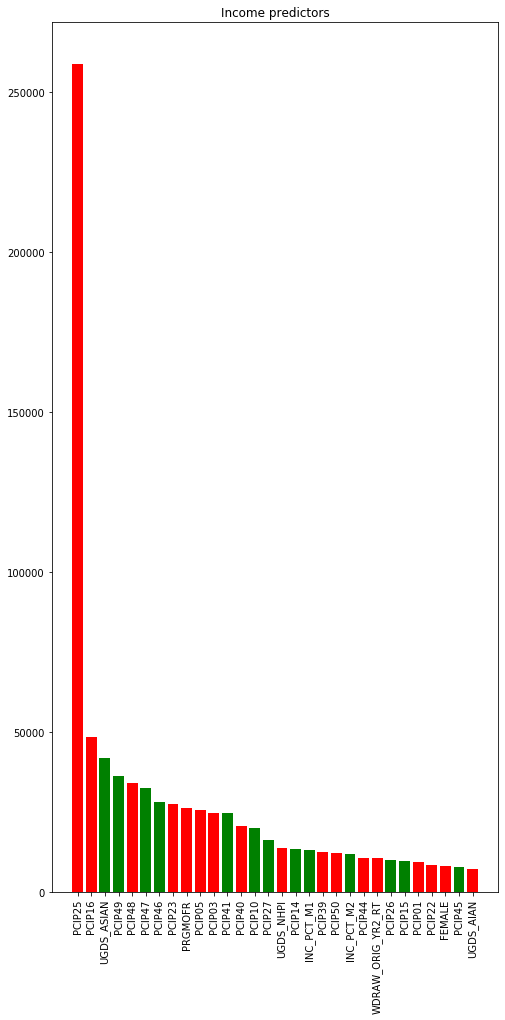

In [193]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax1 = plt.subplots(1,1, figsize=(8,16))
ax1.set_title("Income predictors")
colors = np.array(['g'] * len(x))
colors[~mask.values] = 'r'
ax1.set_xticklabels(x,rotation = 90)
ax1.bar(x,y, color = colors)

plt.show()

In [194]:
random_forest_summary_df_4

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.279177,title_iv.withdrawn_by.2yrs,164 Percent withdrawn from original institu...,"164 completion Name: dev-category, dtype: o..."
1,UGDS_ASIAN,0.195655,demographics.race_ethnicity.asian,447 Total share of enrollment of undergradu...,"447 student Name: dev-category, dtype: object"
2,FTFTPCTPELL_POOLED_SUPP,0.187219,ftft_pell_grant_rate_pooled,"131 Percentage of full-time, first-time deg...","131 aid Name: dev-category, dtype: object"
3,TUITFTE,0.096313,tuition_revenue_per_fte,396 Net tuition revenue per full-time equiv...,"396 school Name: dev-category, dtype: object"
4,PCIP51,0.094933,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
5,PCIP50,0.092602,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
6,PCIP14,0.054102,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"


In [195]:
#now lets do the elastic net model

In [256]:
X = X_base_line
y = y_baseline

In [257]:
#not supposed to be here.  Should have been dropped.  All RPY column values
#X['IND_RPY_1YR_RT']


In [258]:
columns = X.columns.to_list()

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [260]:
y_train_nat = y_train

In [261]:
y_train = y_train.ravel().reshape(1,-1)

In [262]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)


In [263]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 0.05,l1_ratio = .4,  max_iter = 10000, tol = .1)

In [264]:
elastic_net = model.fit(X_train, y_train.ravel())
elastic_net  = model.score(X_test, y_test)
elastic_net

C:\Users\thead\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18693414335.400414, tolerance: 16698004248.356464
  positive)


0.7438889605678654

In [265]:
alpha = [0.01, .05, .1, .15, .2, .4, .6, .8, 1]
l1_ratio = [0, .2, .4, .6, .8, 1]
# Maximum number of levels in tree
fit_intercept = [True, False]
normalize = [True, False]
warm_start = [True, False]
selection = ['cyclic', 'random']
random_state = [10]

random_grid = {'alpha': alpha,
               'l1_ratio': l1_ratio,
               'fit_intercept' : fit_intercept,
               'normalize': normalize,
               'warm_start': warm_start,
               'selection': selection,
               'random_state': random_state}
random_grid

{'alpha': [0.01, 0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1],
 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
 'fit_intercept': [True, False],
 'normalize': [True, False],
 'warm_start': [True, False],
 'selection': ['cyclic', 'random'],
 'random_state': [10]}

In [266]:
elastic_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, verbose = 2, n_iter = 100, random_state=42, n_jobs = -1)

In [267]:
elastic_random.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.6min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ElasticNet(alpha=0.05, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.4,
                                        max_iter=10000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.1, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.05, 0.1, 0.15, 0.2,
                                                  0.4, 0.6, 0.8, 1],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
                                        'normalize': [True, False],
                                        'random_state': [10],
                                 

In [268]:
predicted_y = elastic_random.predict(X_test)

In [269]:
elastic_random.score(X_test, y_test)

0.7958974140576381

In [270]:
elastic_random

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ElasticNet(alpha=0.05, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.4,
                                        max_iter=10000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.1, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.05, 0.1, 0.15, 0.2,
                                                  0.4, 0.6, 0.8, 1],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
                                        'normalize': [True, False],
                                        'random_state': [10],
                                 

In [271]:
elastic_random.best_estimator_

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=10, selection='random', tol=0.1, warm_start=False)

In [272]:
model_best = ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=10, selection='random', tol=0.1, warm_start=False)


In [273]:
model_best.fit(X_train, y_train.ravel())


ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=10, selection='random', tol=0.1, warm_start=False)

In [274]:
model_best.coef_

array([ 3.91653290e+03,  1.39670385e+03,  2.87109392e+01,  0.00000000e+00,
       -4.12922183e+02, -9.72341825e+00, -6.05059244e+01, -3.69736512e+01,
        0.00000000e+00,  3.26663869e+01, -4.52925787e+01, -1.19234197e+02,
        3.16676862e+01,  2.55234215e+02,  2.22744677e+03, -2.93574845e+03,
       -2.18361133e+02, -1.26008114e+03, -4.63989703e-01, -1.42830849e+00,
        1.26893829e+00,  2.46121456e-01,  1.39943190e+00, -6.61713163e-01,
       -1.92288020e-01,  7.22459878e-01, -6.46307655e-01,  6.05527402e+01,
        1.68497618e+01, -1.89940350e+01, -1.30340689e+01,  1.71580774e+01,
       -6.49919240e+01, -1.10018122e+01,  9.95123854e+00,  3.89184741e+01,
       -6.50354562e+01,  1.11648758e+02, -1.02060791e+01,  1.01313582e-02,
       -3.23491184e-01, -8.34060772e+02, -5.02705412e+03,  3.03984572e+02,
       -9.96334780e+02, -2.41078746e+03,  1.57937244e+03,  3.15383255e+03,
       -8.02944131e+02, -1.32261800e+03,  1.12491746e+04,  1.78520243e+03,
       -1.98085157e+03,  

In [277]:
columns = X_train.columns

In [278]:
elasticnet_results = {'columns': columns, 'coefficient': model_best.coef_}

In [279]:
elasticnet_results_df = pd.DataFrame(data = elasticnet_results)

In [281]:
elasticnet_results_df['abs(coef_)'] = np.abs(elasticnet_results_df['coefficient'])

In [282]:
number_of_features = 30
elasticnet_results_df = elasticnet_results_df.sort_values(by = ['abs(coef_)'], axis = 0, ascending = False).head(number_of_features)

In [283]:
elasticnet_results_df

,columns,coefficient,abs(coef_)
123,UGDS_ASIAN,11589.901341,11589.901341
50,PCIP14,11249.174620,11249.174620
75,PCIP50,-7646.612425,7646.612425
262,FEMALE,-7597.052688,7597.052688
217,WDRAW_ORIG_YR2_RT,-6407.413006,6407.413006
76,PCIP51,6040.843019,6040.843019
58,PCIP26,5623.383618,5623.383618
74,PCIP49,5124.369679,5124.369679
42,PCIP03,-5027.054116,5027.054116
64,PCIP39,-4966.183746,4966.183746


In [ ]:
mask = elasticnet_results_df['coefficient'] > 0

In [284]:
x = elasticnet_results_df['columns']
y = elasticnet_results_df['abs(coef_)']

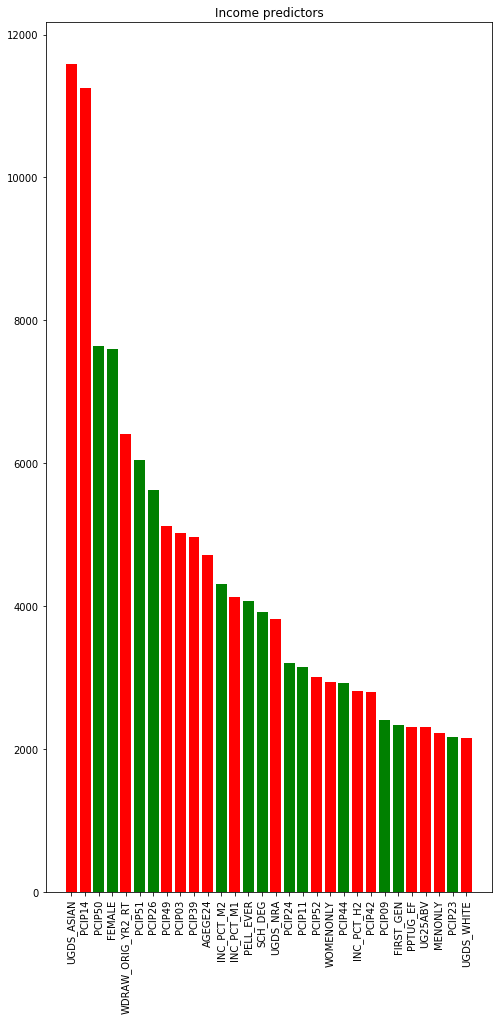

In [285]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax1 = plt.subplots(1,1, figsize=(8,16))
ax1.set_title("Income predictors")
colors = np.array(['g'] * len(x))
colors[~mask.values] = 'r'
ax1.set_xticklabels(x,rotation = 90)
ax1.bar(x,y, color = colors)

plt.show()

19 features, reduction of 94.21%


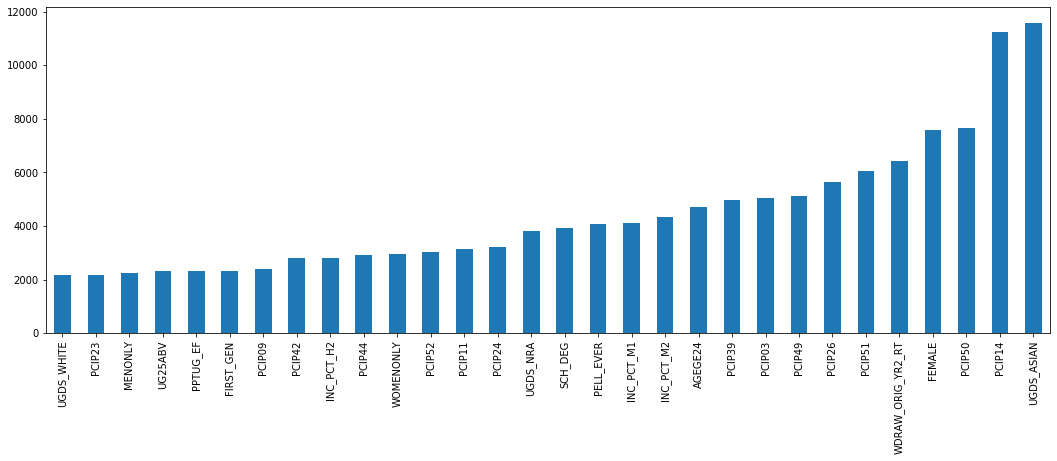

In [280]:

feature_importance = pd.Series(index = X_train.columns, data = np.abs(model_best.coef_))

n_selected_features = (feature_importance>3000).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))



In [217]:
feature_importance.sort_values(ascending = False).head(50)

UGDS_ASIAN                  11589.901341
PCIP14                      11249.174620
PCIP50                       7646.612425
FEMALE                       7597.052688
WDRAW_ORIG_YR2_RT            6407.413006
PCIP51                       6040.843019
PCIP26                       5623.383618
PCIP49                       5124.369679
PCIP03                       5027.054116
PCIP39                       4966.183746
AGEGE24                      4712.971196
INC_PCT_M2                   4317.543280
INC_PCT_M1                   4123.846292
PELL_EVER                    4079.169747
SCH_DEG                      3916.532897
UGDS_NRA                     3821.383287
PCIP24                       3205.565691
PCIP11                       3153.832550
PCIP52                       3017.463799
WOMENONLY                    2935.748448
PCIP44                       2931.823143
INC_PCT_H2                   2817.653198
PCIP42                       2799.509519
PCIP09                       2410.787457
FIRST_GEN       